# <b><center><span style='color:darkblue'> House  Price Prediction </span></center>

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## <span style='color:darkblue'> Importing Libraries</span>

In [1]:

import warnings # Supress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import numpy as np
import pandas as pd
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score,precision_recall_curve
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics


##### <span style='color:darkred'> To display maximum columns, rows in dataframe, modfying display options of pandas. </span>


In [2]:
pd.set_option("display.max_columns", None)

## <span style='color:darkblue'> Task 1: Exploratory Data Analysis on Application Data </span>

### <p> <span style="color : darkred"> <i> Subtask 1.1: Read the Collected HOuse sales Data. </i> </span> 
<span style="color : purple"> Reading the house sales data file i.e., 'train.csv' and storing it in a dataframe "sales_data".</span> </p>

In [3]:
sales_data = pd.read_csv('train.csv')

### <p><span style='color:darkred'> <i>Subtask 1.2: Data Sanity checks</i></span>

Subtask 1.2.1: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Exploring the data outline 
sales_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Lets check dimensions of data
print(f"Shape of Dataframe: {sales_data.shape}")

Shape of Dataframe: (1460, 81)


In [6]:
print("Information of Dataframe: " )
sales_data.info(verbose = True)

Information of Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

In [7]:
#Lets view statistical aspects of data
print("Description of Dataframe: " )
sales_data.describe()

Description of Dataframe: 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



### <p> <span style="color : darkred"> <i> Subtask 1.2.2 Verifying Duplicate records </i></span></p>


In [8]:
# Validate duplicate entries if any recorded by employees against each customer

print("Duplicate Records count in Entire Dataframe : {}".format(len(sales_data[sales_data.duplicated()])))
print("Duplicate Records count w.r.t ID in Dataframe : {}".format(len(sales_data[sales_data["Id"].duplicated()])))


Duplicate Records count in Entire Dataframe : 0
Duplicate Records count w.r.t ID in Dataframe : 0


<br><span style="color : green"><b>
Fom above we could observe Target variable is SalesPrice. Also Id have unique row indices provided from data sources for each entry of record, thus we shall drop this column </b>
</span>

### <p> <span style='color:darkred'> <i> Subtask 1.2.2 Identifying Missing Values</i>  </p> </span>

In [9]:
print(f"Null value count:" )
def chk_null_count():
    ''' Function  to get Null Frame , prints columns null value details if any exist'''
   # null_frame = leads_data.isnull().sum().sort_values(ascending=False)
    null_frame = round(100 * sales_data.isnull().sum().to_frame("perc").query('perc>0')/len(sales_data),4).sort_values(by= 'perc', ascending=False)
    null_frame["count"]= sales_data.isnull().sum().to_frame("count").query('count>0').sort_values(by= 'count', ascending=False) 
   
    return null_frame

null_frame= chk_null_count()
null_frame

Null value count:


,perc,count
PoolQC,99.5205,1453
MiscFeature,96.3014,1406
Alley,93.7671,1369
Fence,80.7534,1179
FireplaceQu,47.2603,690
LotFrontage,17.7397,259
GarageType,5.5479,81
GarageYrBlt,5.5479,81
GarageFinish,5.5479,81
GarageQual,5.5479,81


### <p> <span style='color:darkred'> <i> Subtask 1.2.2.1 Handling missing values </i>  </p> </span>

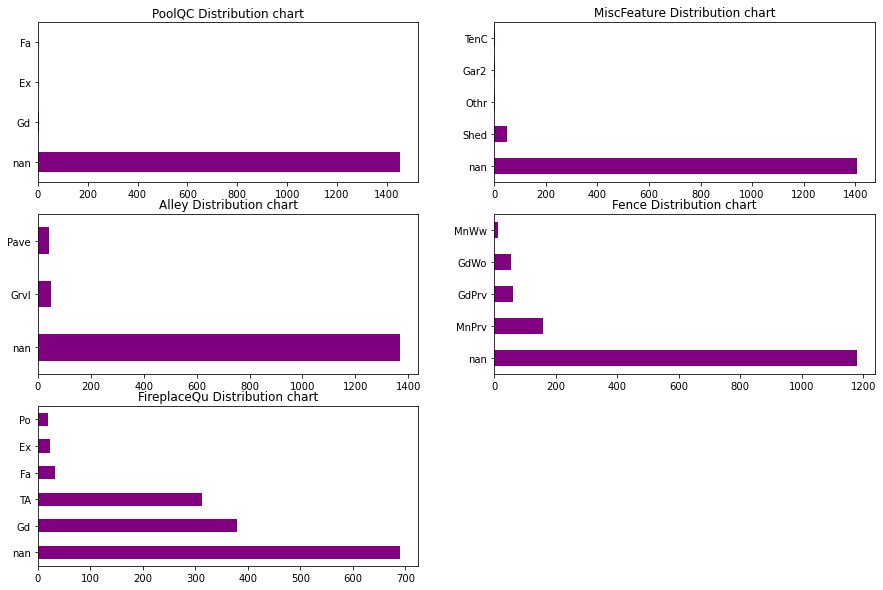

In [10]:
# Performming Distribution analysis of Null frame columns

def distr_chart(cols):
    j=1
    plt.figure(figsize= (15,10))
    for i in cols:  
        plt.subplot(3,2,j)
        sales_data[i].value_counts(dropna=False).plot.barh(color="purple")
        plt.title(i+" Distribution chart")
        j=j+1

cols=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]
distr_chart(cols)


<AxesSubplot:ylabel='Frequency'>

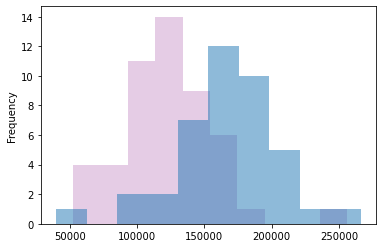

In [11]:
sales_data.loc[sales_data["Alley"]=="Grvl","SalePrice"].plot.hist(color="purple",alpha=0.2)
sales_data.loc[sales_data["Alley"]=="Pave","SalePrice"].plot.hist(alpha=0.5)


<AxesSubplot:ylabel='Frequency'>

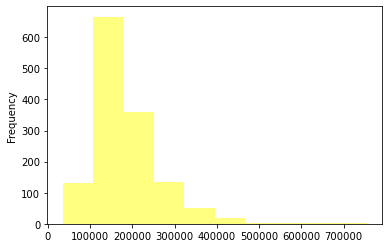

In [12]:
sales_data.loc[sales_data["Alley"].isnull(),"SalePrice"].plot.hist(color="yellow",alpha=0.5)

<br><span style="color : green"><b>
As the columnns above contains more than 45 % missing data, any imputation technique would result tampering the dimensions and also dropping the records might remove other features as well. So it is better to remove such features to avoid further analysis.
However here the null values is adding information of no such facilities provided.
Let us drop PoolQc, Miscfeature columns due to singularlity of information.With replace nulls by NA in others as per data dictionary.


In [13]:
sales_data.drop(columns=["PoolQC","MiscFeature"], inplace=True)
print(f"Shape of Dataframe: {sales_data.shape}")

Shape of Dataframe: (1460, 79)


In [14]:
cols=["Alley","Fence","FireplaceQu"]
for i in cols:
    sales_data[i].fillna("NA", inplace=True)
null_frame= chk_null_count()
null_frame

,perc,count
LotFrontage,17.7397,259
GarageType,5.5479,81
GarageYrBlt,5.5479,81
GarageFinish,5.5479,81
GarageQual,5.5479,81
GarageCond,5.5479,81
BsmtExposure,2.6027,38
BsmtFinType2,2.6027,38
BsmtQual,2.5342,37
BsmtCond,2.5342,37


<AxesSubplot:ylabel='Frequency'>

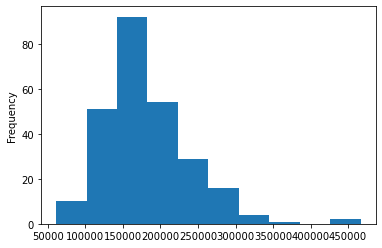

In [15]:
sales_data.loc[sales_data["LotFrontage"].isnull(),"SalePrice"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

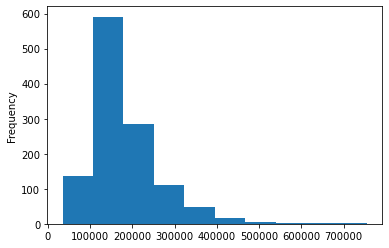

In [16]:
df=sales_data.loc[~sales_data["LotFrontage"].isnull(),["SalePrice","LotFrontage"]]
df["SalePrice"].plot.hist()

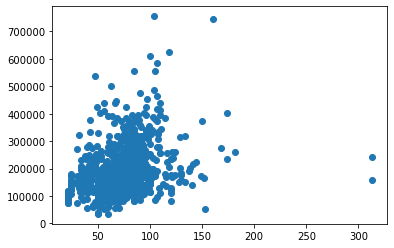

In [17]:
plt.scatter(x=df["LotFrontage"],y=df["SalePrice"])

In [18]:
df["LotFrontage"].median()

69.0

<br><span style="color : green"><b>
As missing percenatge is around 17,following the skewed distribution better is to impute either by model imputation or median statistical interpolation.
For now let us go with median value interpolation.

In [19]:
sales_data["LotFrontage"].fillna(sales_data["LotFrontage"].median(), inplace=True)

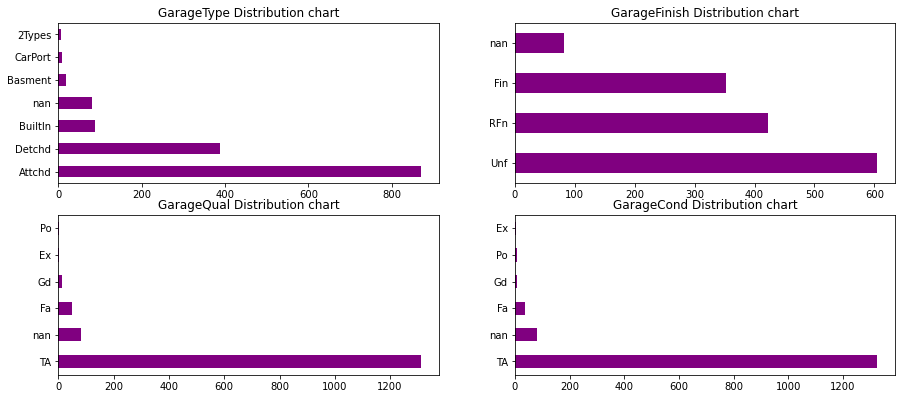

In [20]:
cols=["GarageType","GarageFinish","GarageQual","GarageCond"]
distr_chart(cols)

In [21]:
# pip install missingno

import missingno as mn

<AxesSubplot:>

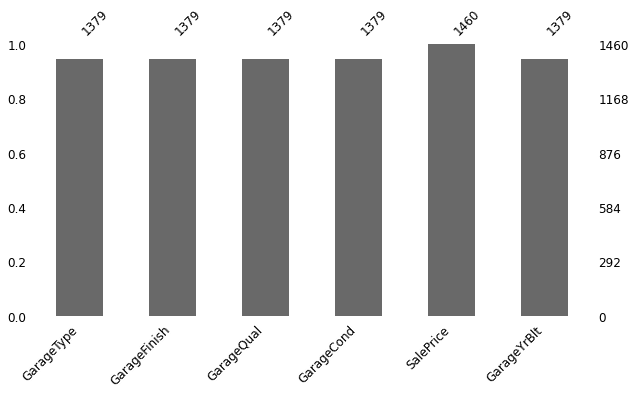

In [22]:
cols=["GarageType","GarageFinish","GarageQual","GarageCond"]
cols.extend(["SalePrice","GarageYrBlt"])
mn.bar(sales_data[cols], figsize=(10,5), fontsize=12)

In [23]:
sales_data.loc[sales_data["GarageCond"].isnull(),["GarageYrBlt","GarageType","GarageQual","GarageFinish"]].drop_duplicates()

,GarageYrBlt,GarageType,GarageQual,GarageFinish
39,NaN,NaN,NaN,NaN


In [24]:
cols=["GarageType","GarageFinish","GarageQual","GarageCond"]
for i in cols:
    sales_data[i].fillna("NA", inplace=True)

In [25]:
null_frame= chk_null_count()
null_frame

,perc,count
GarageYrBlt,5.5479,81
BsmtExposure,2.6027,38
BsmtFinType2,2.6027,38
BsmtQual,2.5342,37
BsmtCond,2.5342,37
BsmtFinType1,2.5342,37
MasVnrType,0.5479,8
MasVnrArea,0.5479,8
Electrical,0.0685,1


<br><span style="color : green"><b>
    From dataframe.describe() one pattern is clearly evident that all year columns has max year as 2010 which indicates the data is collected till 2010 so let us use this point as referene an determine age.



In [26]:
sales_data["GarageYrBltage"]=(2010-sales_data["GarageYrBlt"]).fillna(-1).astype("int")

#similarly let us extract count of year from year-yyyy
sales_data['YearBuiltage'] = (2010-sales_data["YearBuilt"]).astype("int")
sales_data['YearRemodAddage'] = (2010-sales_data["YearRemodAdd"]).astype("int") 
sales_data['YrSoldage'] = (2010-sales_data["YrSold"]).astype("int")

#Since Remodal and sold provided corresponds to linearity,  Extracting year of sold from remodal to sold.
sales_data['SoldAge']=sales_data['YrSoldage']-sales_data['YearRemodAddage']

sales_data.drop(columns=["GarageYrBlt",'YearBuilt','YearRemodAdd','YearRemodAddage','YrSoldage','YrSold','MoSold',"Id"], inplace=True)

print(f"Shape of Dataframe: {sales_data.shape}")

Shape of Dataframe: (1460, 76)


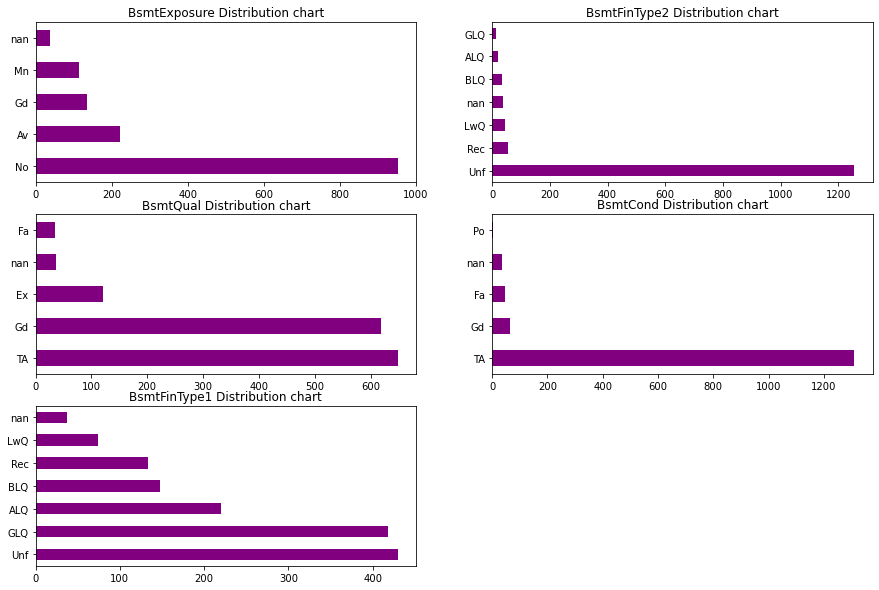

In [27]:
cols=["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]
distr_chart(cols)

<AxesSubplot:>

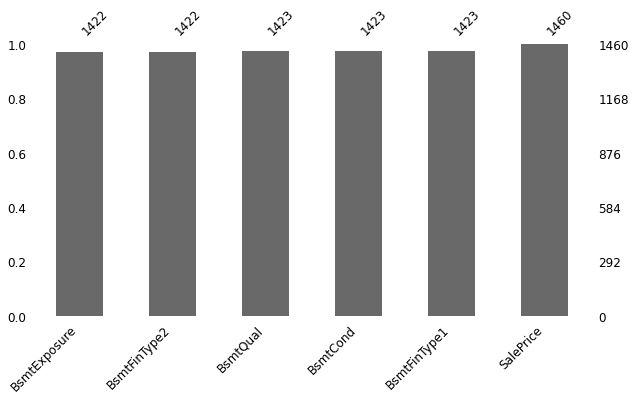

In [28]:
cols.append("SalePrice")
mn.bar(sales_data[cols], figsize=(10,5), fontsize=12)

In [29]:
cols=["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]
for i in cols:
    sales_data[i].fillna("NA", inplace=True)

In [30]:
null_frame= chk_null_count()
null_frame

,perc,count
MasVnrType,0.5479,8
MasVnrArea,0.5479,8
Electrical,0.0685,1


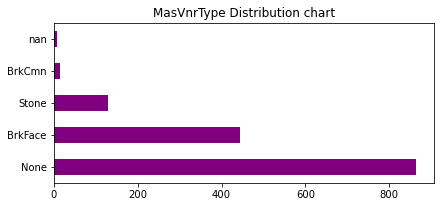

In [31]:
cols=["MasVnrType"]
distr_chart(cols)

<AxesSubplot:>

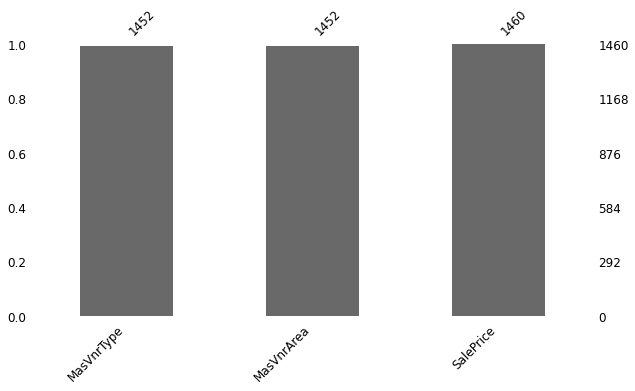

In [32]:
cols=["MasVnrType","MasVnrArea"]
cols.append("SalePrice")
mn.bar(sales_data[cols], figsize=(10,5), fontsize=12)

In [33]:
#Let us impute NOne in MasVnrType, -1 in MasVnrArea, drop row of electrical
sales_data["MasVnrType"].fillna("None", inplace=True)
sales_data["MasVnrArea"].fillna(-1, inplace=True)


In [34]:
null_frame= chk_null_count()
null_frame

,perc,count
Electrical,0.0685,1


In [35]:

sales_data.dropna(inplace=True)

In [36]:
null_frame= chk_null_count()
null_frame

,perc,count


### <p> <span style='color:darkred'> <i> Subtask 1.2.3 Outlier Analysis </i>  </p> </span>


103  count of extreme outliers removed from Column  MSSubClass
7.06  percentage of extreme outliers removed from Column  MSSubClass


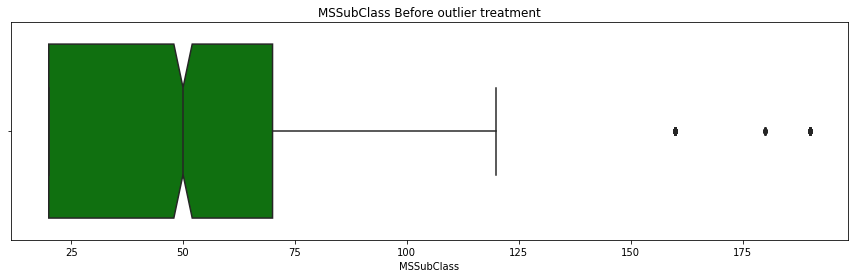

106  count of extreme outliers removed from Column  LotFrontage
7.27  percentage of extreme outliers removed from Column  LotFrontage


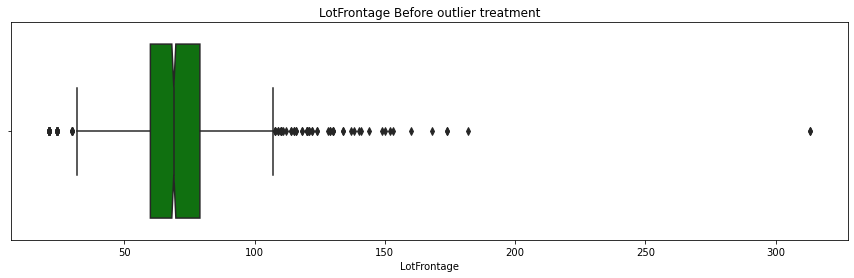

68  count of extreme outliers removed from Column  LotArea
4.66  percentage of extreme outliers removed from Column  LotArea


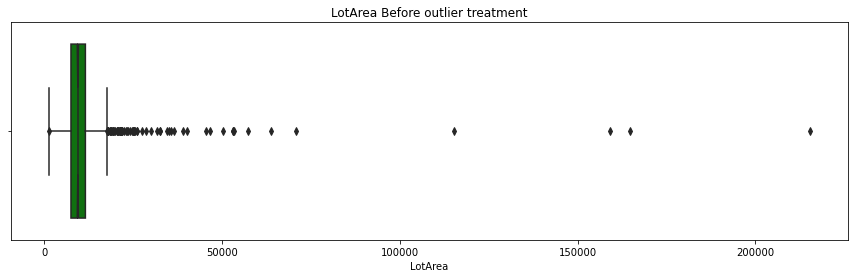

2  count of extreme outliers removed from Column  OverallQual
0.14  percentage of extreme outliers removed from Column  OverallQual


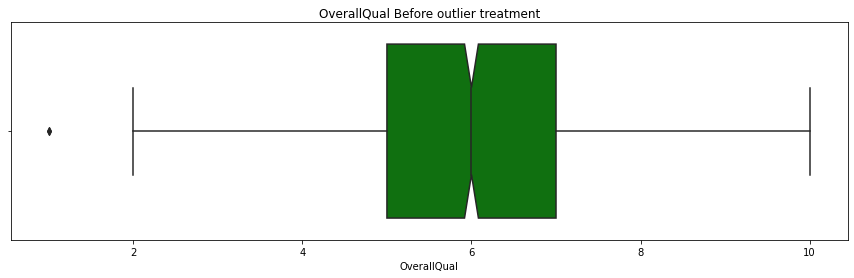

125  count of extreme outliers removed from Column  OverallCond
8.57  percentage of extreme outliers removed from Column  OverallCond


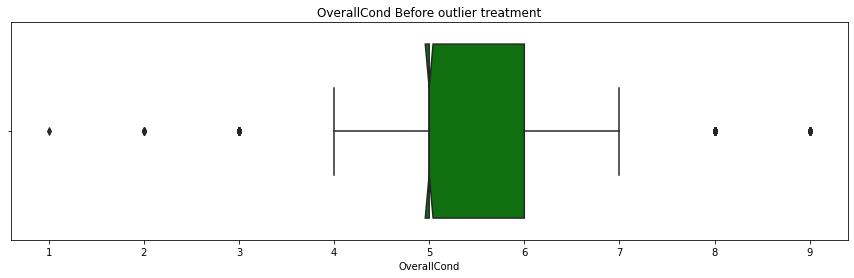

98  count of extreme outliers removed from Column  MasVnrArea
6.72  percentage of extreme outliers removed from Column  MasVnrArea


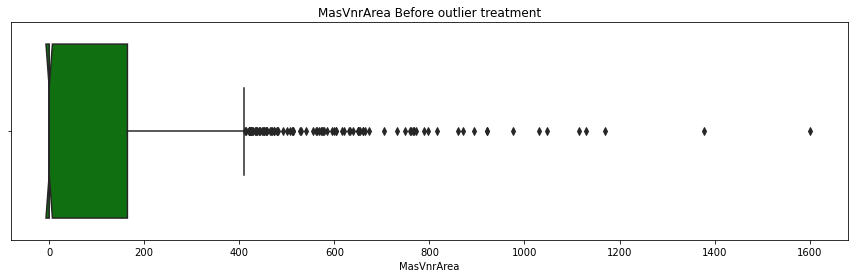

7  count of extreme outliers removed from Column  BsmtFinSF1
0.48  percentage of extreme outliers removed from Column  BsmtFinSF1


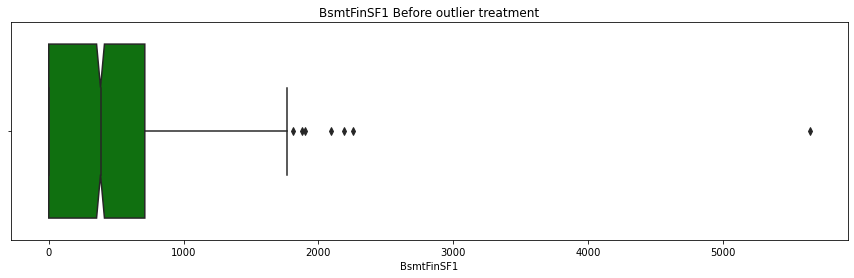

167  count of extreme outliers removed from Column  BsmtFinSF2
11.45  percentage of extreme outliers removed from Column  BsmtFinSF2


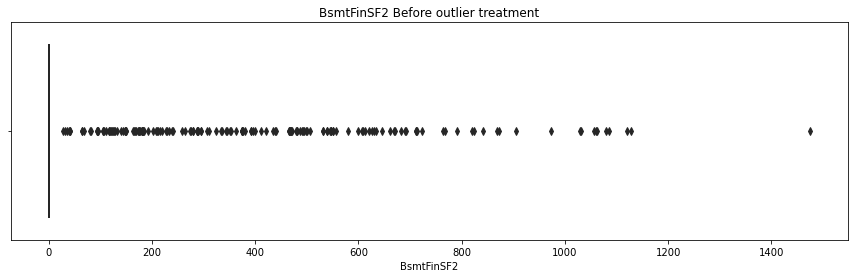

29  count of extreme outliers removed from Column  BsmtUnfSF
1.99  percentage of extreme outliers removed from Column  BsmtUnfSF


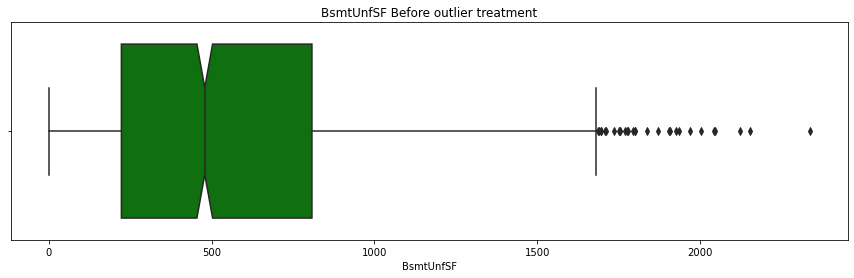

61  count of extreme outliers removed from Column  TotalBsmtSF
4.18  percentage of extreme outliers removed from Column  TotalBsmtSF


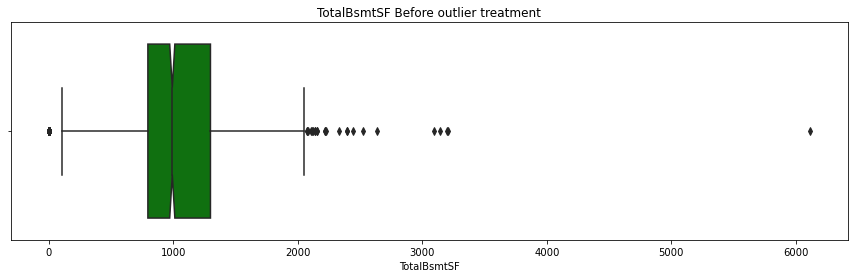

20  count of extreme outliers removed from Column  1stFlrSF
1.37  percentage of extreme outliers removed from Column  1stFlrSF


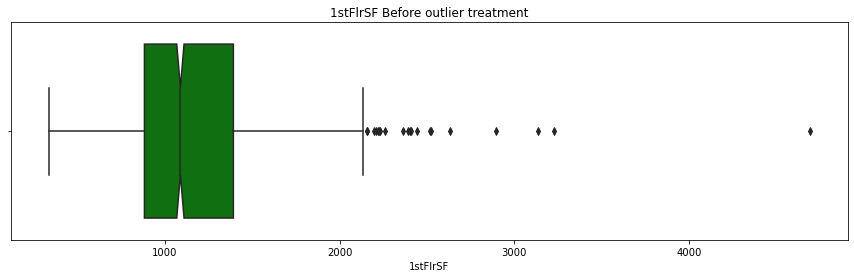

2  count of extreme outliers removed from Column  2ndFlrSF
0.14  percentage of extreme outliers removed from Column  2ndFlrSF


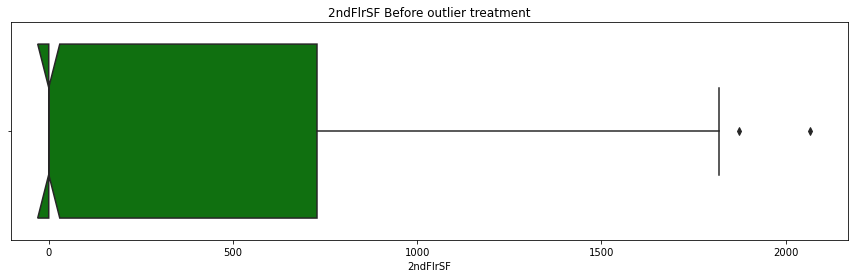

26  count of extreme outliers removed from Column  LowQualFinSF
1.78  percentage of extreme outliers removed from Column  LowQualFinSF


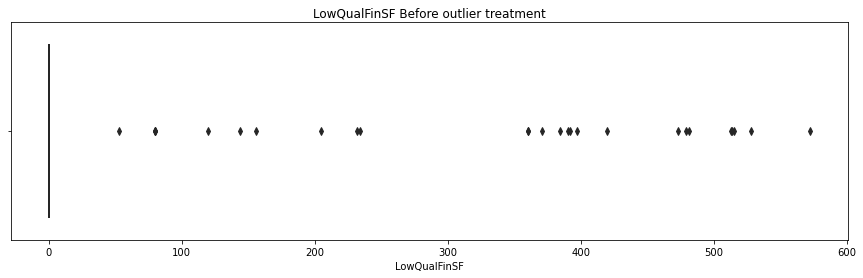

31  count of extreme outliers removed from Column  GrLivArea
2.12  percentage of extreme outliers removed from Column  GrLivArea


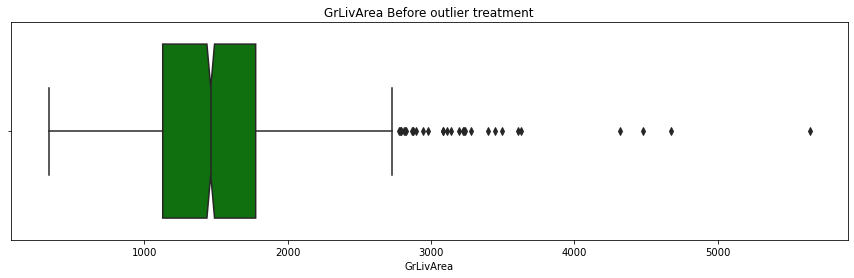

1  count of extreme outliers removed from Column  BsmtFullBath
0.07  percentage of extreme outliers removed from Column  BsmtFullBath


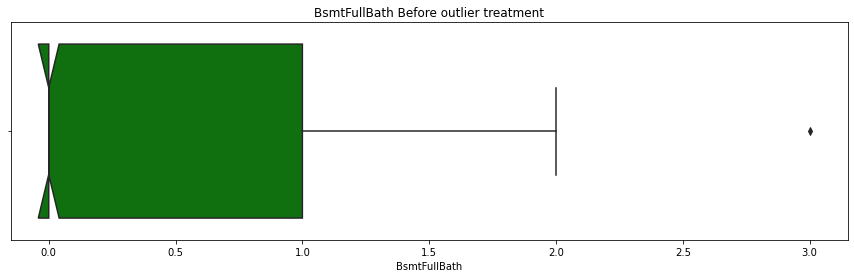

82  count of extreme outliers removed from Column  BsmtHalfBath
5.62  percentage of extreme outliers removed from Column  BsmtHalfBath


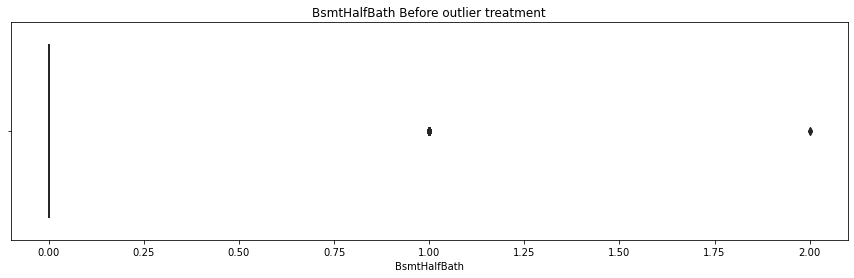

0  count of extreme outliers removed from Column  FullBath
0.0  percentage of extreme outliers removed from Column  FullBath


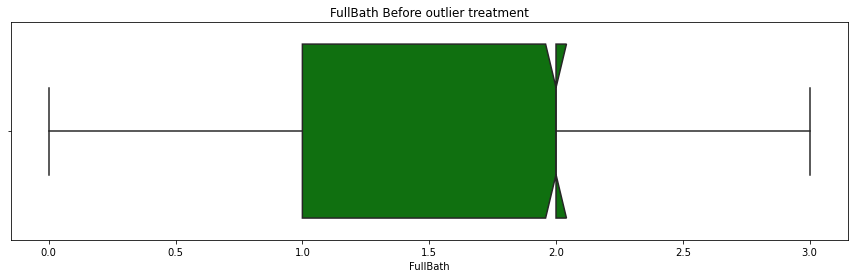

0  count of extreme outliers removed from Column  HalfBath
0.0  percentage of extreme outliers removed from Column  HalfBath


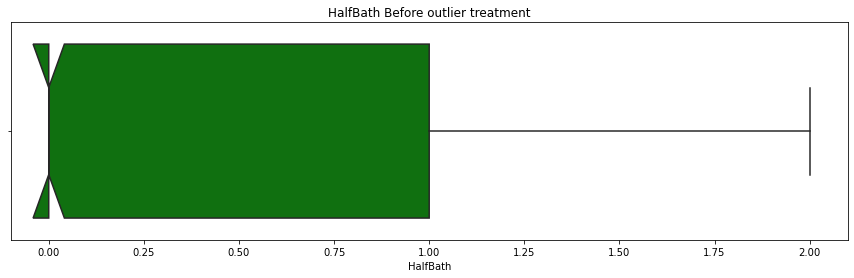

35  count of extreme outliers removed from Column  BedroomAbvGr
2.4  percentage of extreme outliers removed from Column  BedroomAbvGr


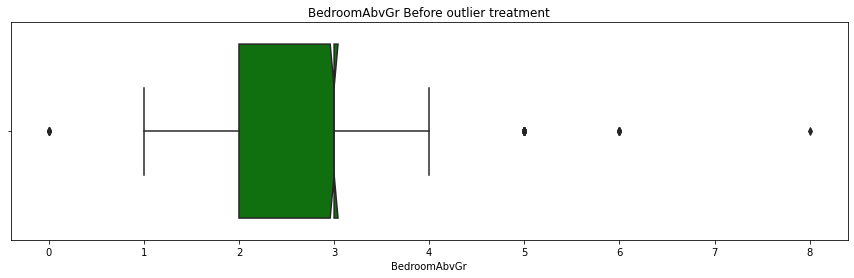

68  count of extreme outliers removed from Column  KitchenAbvGr
4.66  percentage of extreme outliers removed from Column  KitchenAbvGr


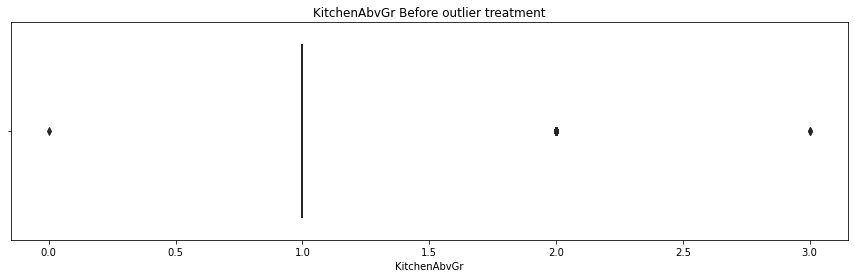

30  count of extreme outliers removed from Column  TotRmsAbvGrd
2.06  percentage of extreme outliers removed from Column  TotRmsAbvGrd


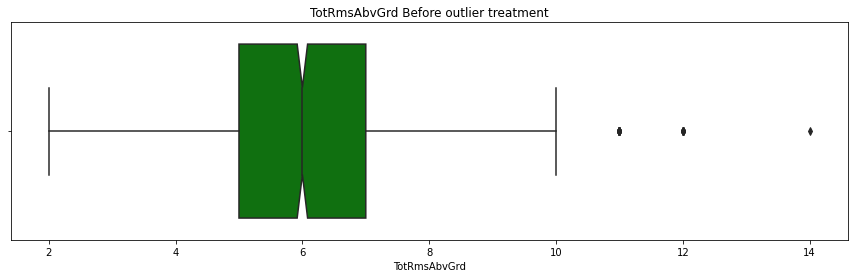

5  count of extreme outliers removed from Column  Fireplaces
0.34  percentage of extreme outliers removed from Column  Fireplaces


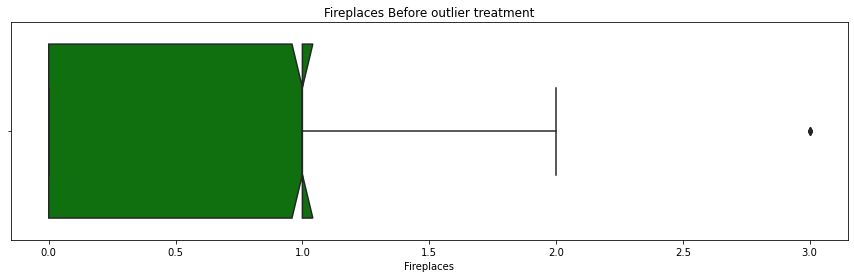

5  count of extreme outliers removed from Column  GarageCars
0.34  percentage of extreme outliers removed from Column  GarageCars


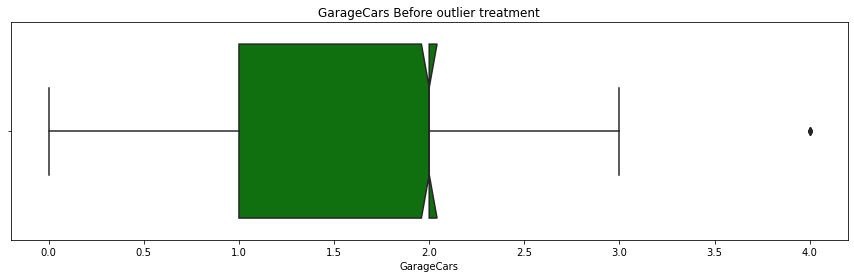

21  count of extreme outliers removed from Column  GarageArea
1.44  percentage of extreme outliers removed from Column  GarageArea


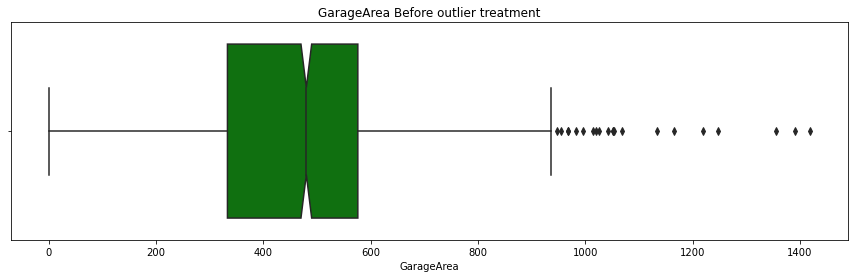

32  count of extreme outliers removed from Column  WoodDeckSF
2.19  percentage of extreme outliers removed from Column  WoodDeckSF


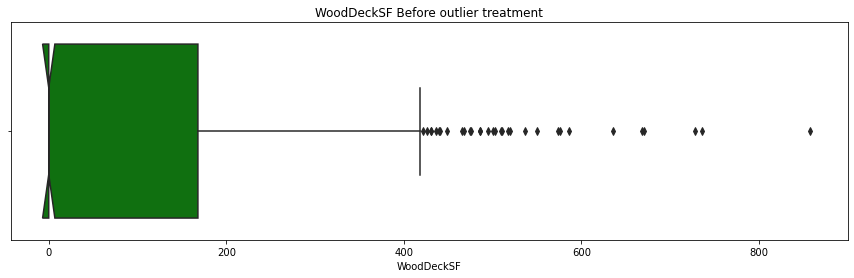

77  count of extreme outliers removed from Column  OpenPorchSF
5.28  percentage of extreme outliers removed from Column  OpenPorchSF


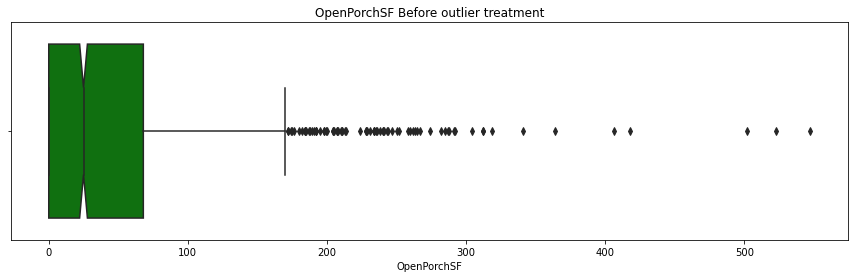

208  count of extreme outliers removed from Column  EnclosedPorch
14.26  percentage of extreme outliers removed from Column  EnclosedPorch


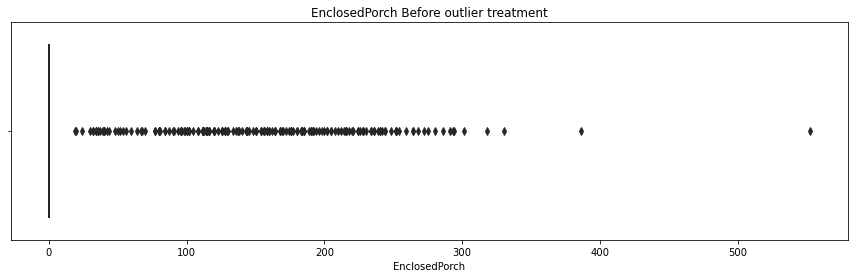

24  count of extreme outliers removed from Column  3SsnPorch
1.64  percentage of extreme outliers removed from Column  3SsnPorch


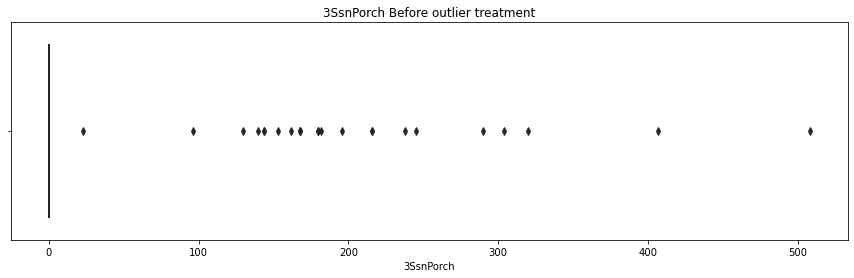

116  count of extreme outliers removed from Column  ScreenPorch
7.95  percentage of extreme outliers removed from Column  ScreenPorch


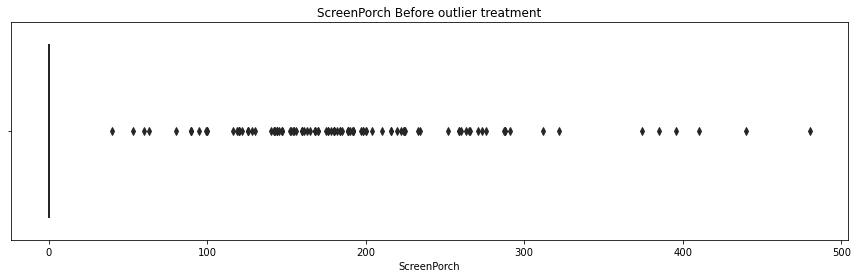

7  count of extreme outliers removed from Column  PoolArea
0.48  percentage of extreme outliers removed from Column  PoolArea


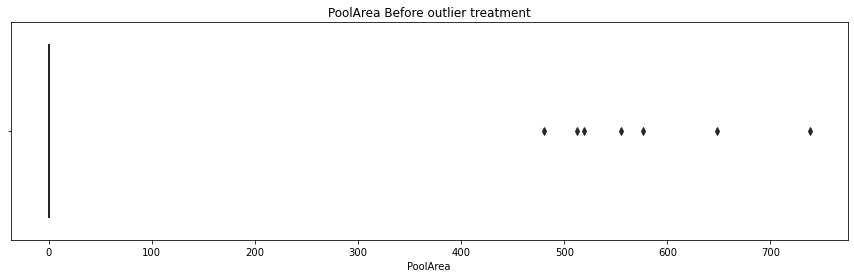

52  count of extreme outliers removed from Column  MiscVal
3.56  percentage of extreme outliers removed from Column  MiscVal


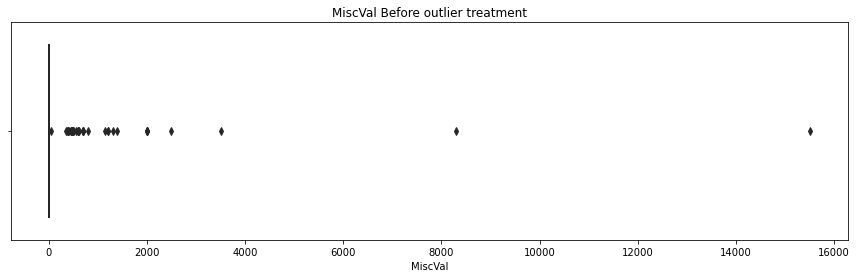

61  count of extreme outliers removed from Column  SalePrice
4.18  percentage of extreme outliers removed from Column  SalePrice


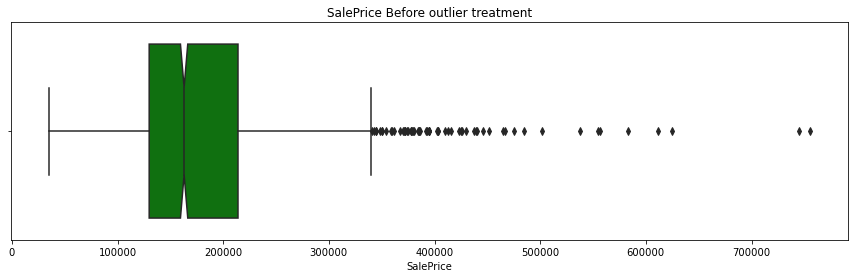

1  count of extreme outliers removed from Column  GarageYrBltage
0.07  percentage of extreme outliers removed from Column  GarageYrBltage


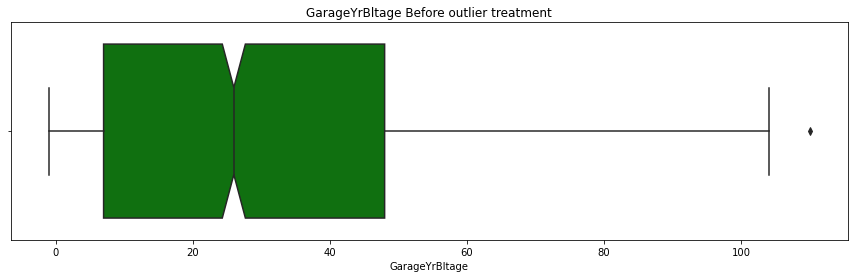

7  count of extreme outliers removed from Column  YearBuiltage
0.48  percentage of extreme outliers removed from Column  YearBuiltage


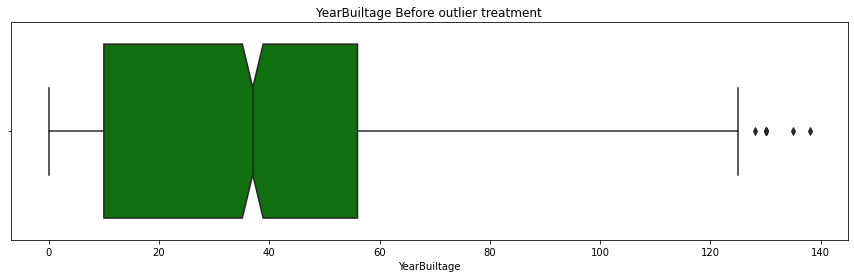

0  count of extreme outliers removed from Column  SoldAge
0.0  percentage of extreme outliers removed from Column  SoldAge


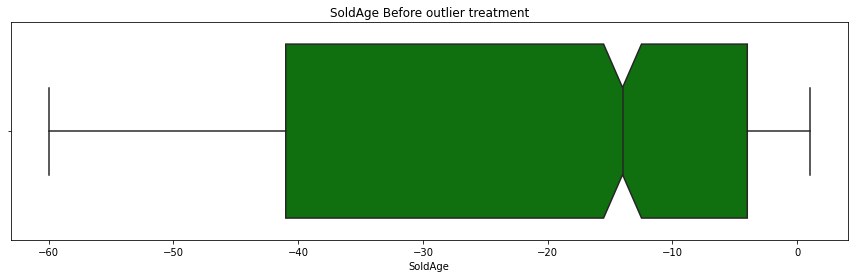

In [37]:
#Numerical columns
numcols= sales_data.select_dtypes(exclude='object').columns.to_list()
for i in numcols:
    fig = plt.figure(figsize=(15,4))  
    plt.subplot(1,1,1)
    #print(df)
    sns.boxplot(x = sales_data[i], notch = True,color ="green"  )
    plt.title(i+" Before outlier treatment")  
    
    #Dropping records iwth extrem outliers from k factor 2
    quant25,quant75 = np.percentile(sorted(sales_data[i]) , [25,75])
    Iqr = quant75 - quant25    
    bound = Iqr *1.5*1
    lowerb, upperb = quant25 - bound, quant75 + bound
    length = len(sales_data[((sales_data[i] < lowerb) | (sales_data[i] > upperb))])
    
    print(length, " count of extreme outliers removed from Column ",i)
    print(round(100*length/len(sales_data),2), " percentage of extreme outliers removed from Column ",i)
    plt.show()
    

 <br><span style="color : green"><b>
    Though the numerical columns contains outliers within threshold of 10%, it is suggested to analyze these further to take imperative actions.Therefore not to lose added information, it is suggested to discuss with subject experts on these.

### <p> <span style="color : darkred"> <i> Subtask 1.2.4 Univariate, Bivariate and Multivariate Data Analysis </i></span></p>


### <p> <span style="color : darkred"> <i> Subtask 1.2.4.1 Target variable Analysis </i></span></p>


In [38]:
sales_data['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

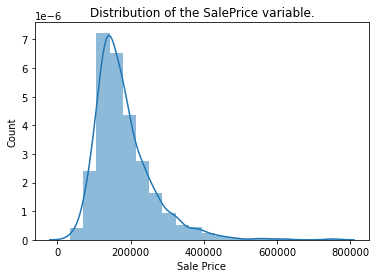

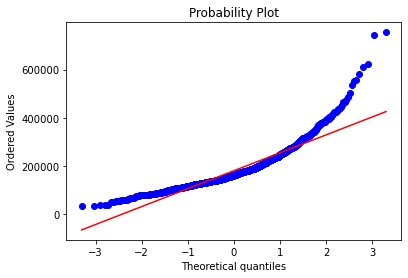

In [39]:
#Check the distribution the SalePrice
sns.distplot(sales_data['SalePrice'], kde=True, bins=20, hist_kws={"alpha": 0.5}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()
#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(sales_data['SalePrice'], plot=plt)
plt.show()

<br><span style="color : green"><b>
    As target variable distribution is rightly skewed , we shall perform log transformation to maintain normal distribution and support better model.


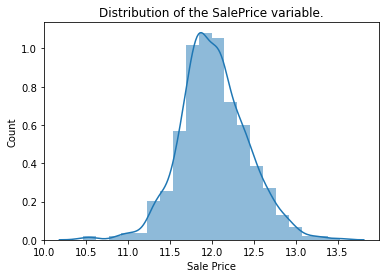

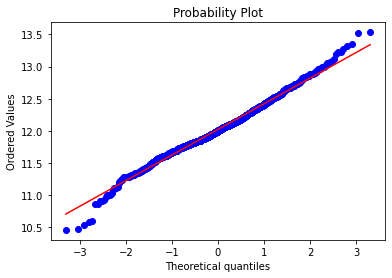

In [40]:
sales_data["SalePrice"] = np.log(sales_data["SalePrice"])
sns.distplot(sales_data['SalePrice'], kde=True, bins=20, hist_kws={"alpha": 0.5}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()
fig = plt.figure()
res = stats.probplot(sales_data['SalePrice'], plot=plt)
plt.show()

In [41]:
#categorical columns
catcols= sales_data.select_dtypes(include='object').columns.to_list()


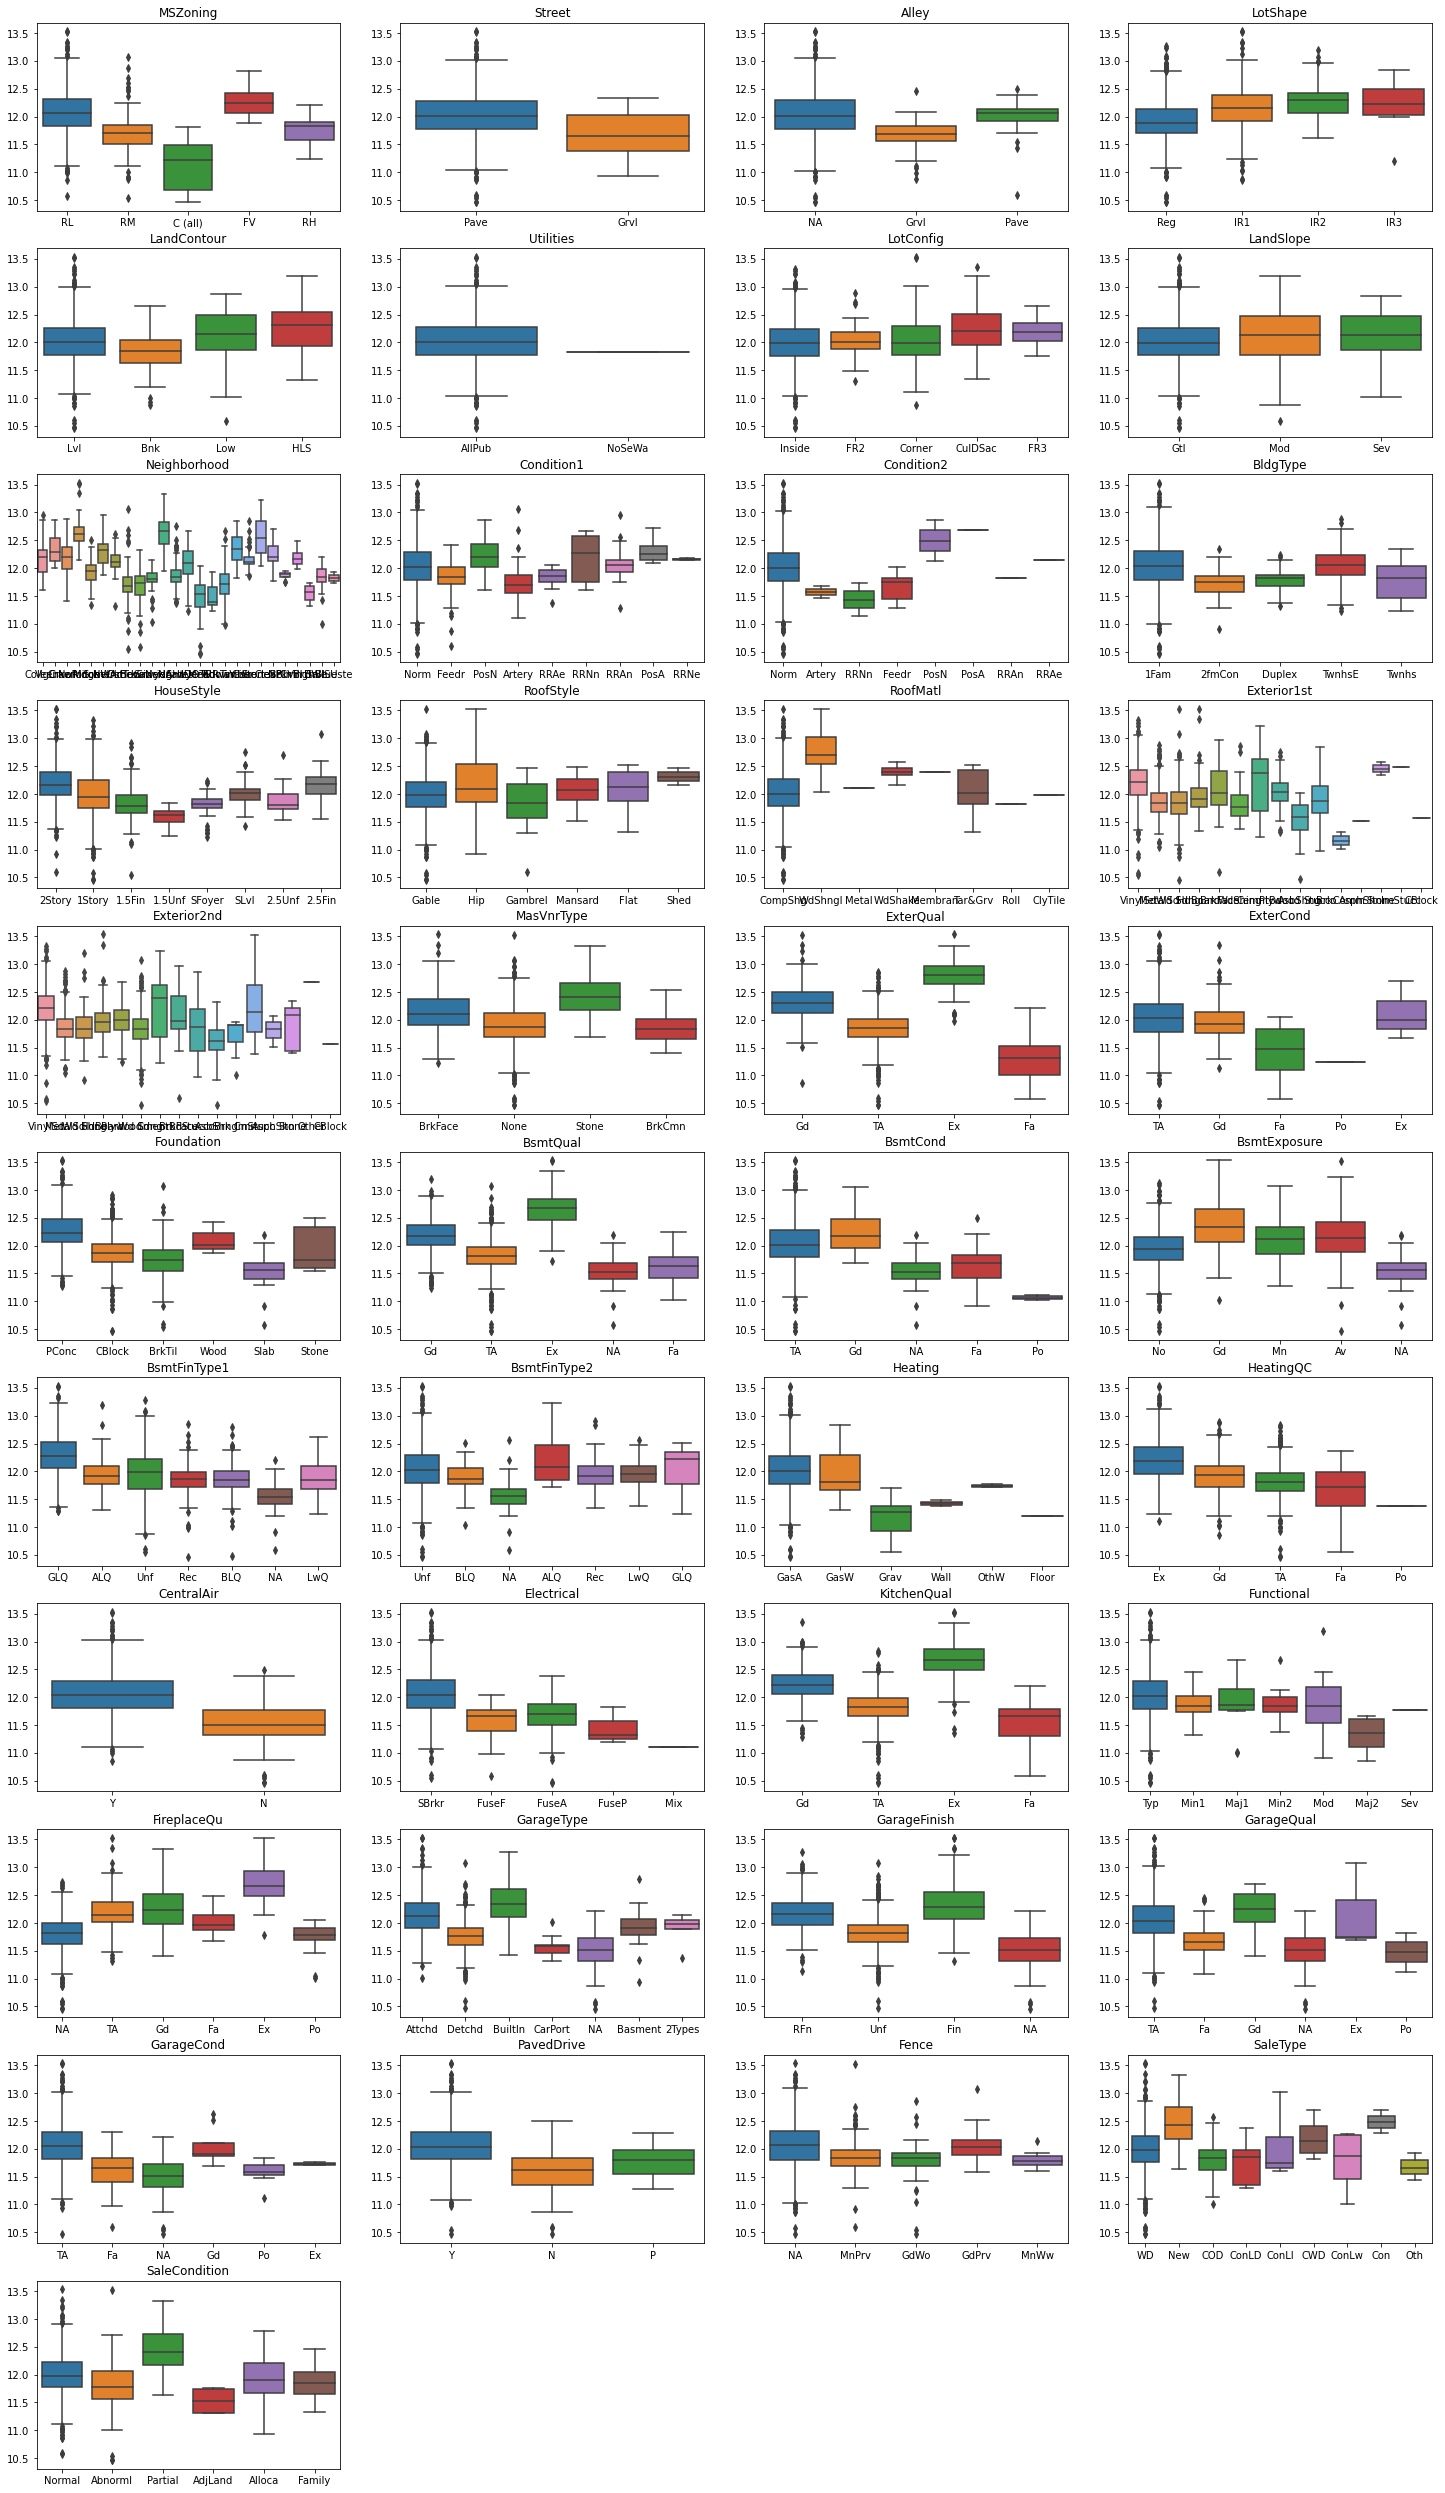

In [42]:
def box_categorical(cols):
    plt.figure(figsize=(25, 45))
    count=1
    for i in cols:  
        plt.subplot(11, 4, count)
        sns.boxplot(x=sales_data[i], y=sales_data["SalePrice"]).set(ylabel=None, xlabel=None)
        count+=1
        plt.title(i)
box_categorical(catcols)

In [43]:
#Numerical cols
numcols= sales_data.select_dtypes(exclude='object').columns.to_list()
len(numcols)

35

<Figure size 1800x3240 with 0 Axes>

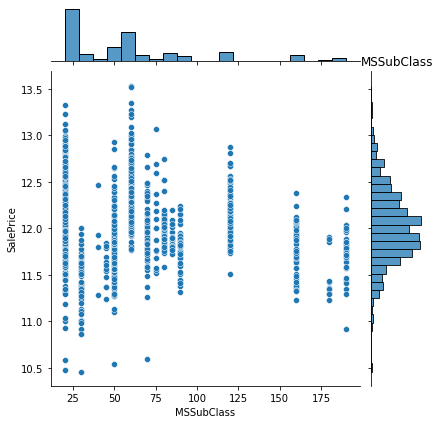

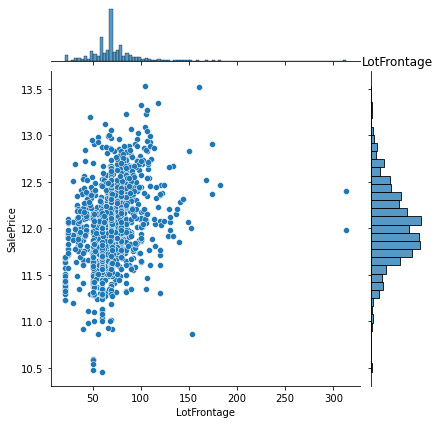

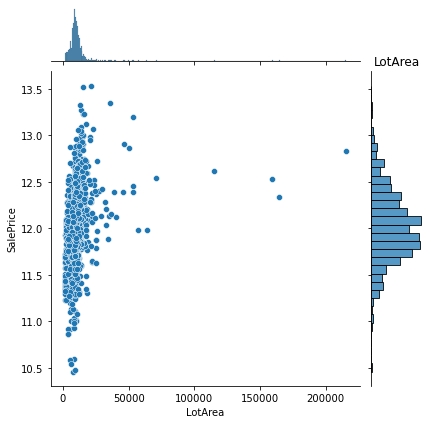

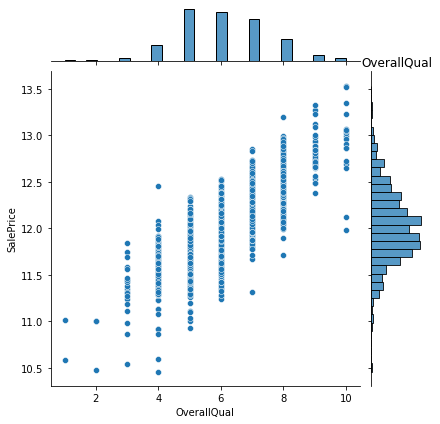

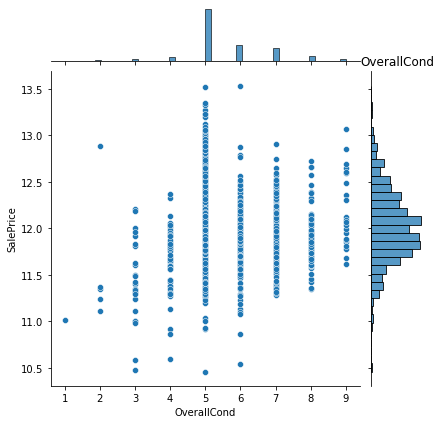

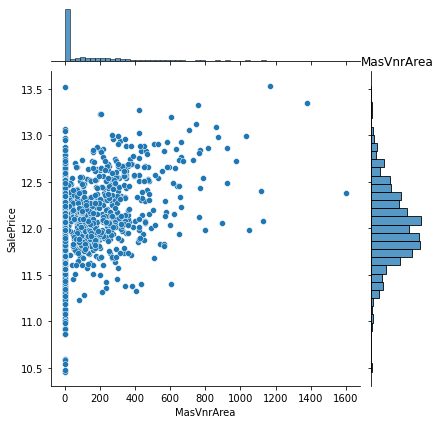

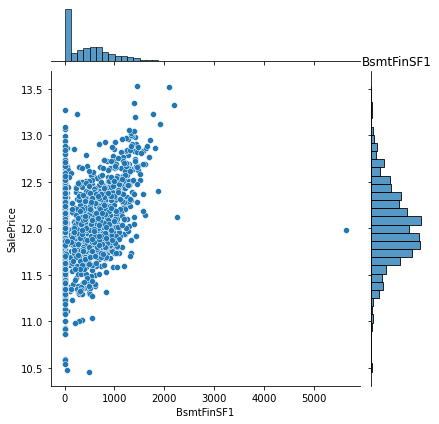

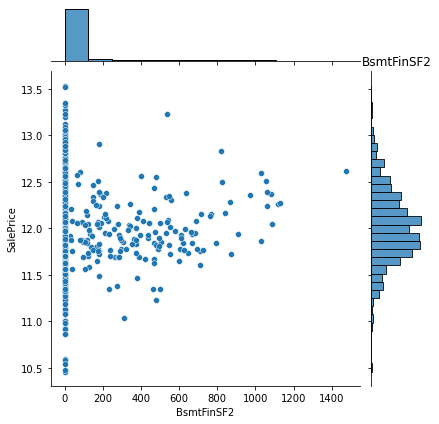

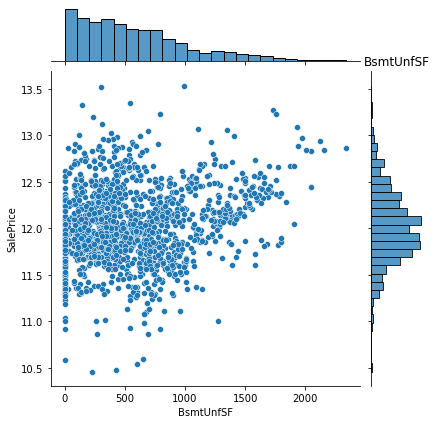

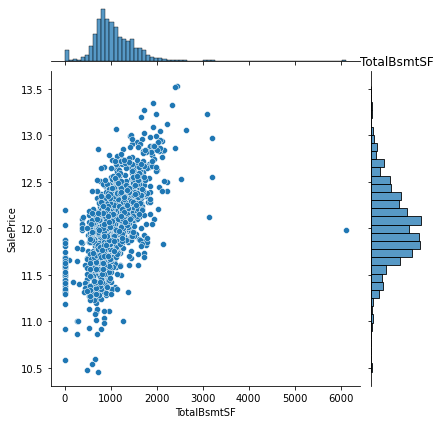

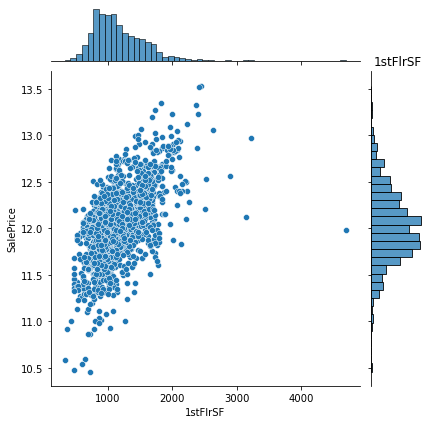

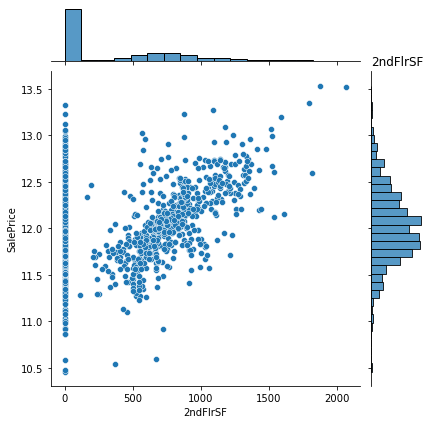

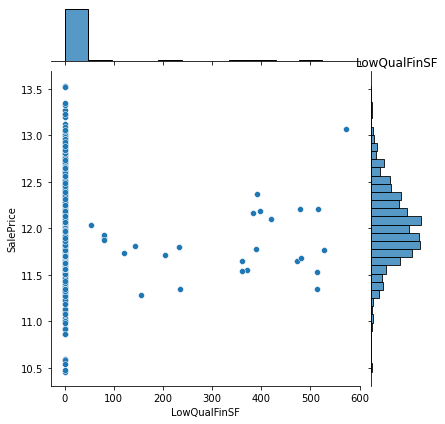

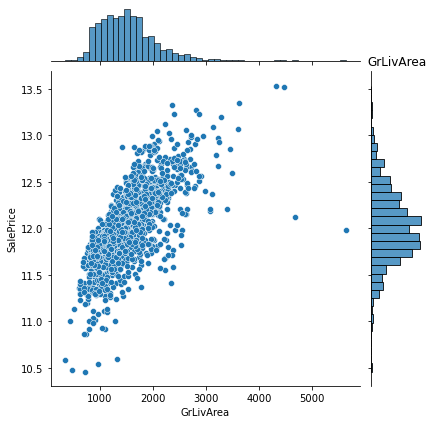

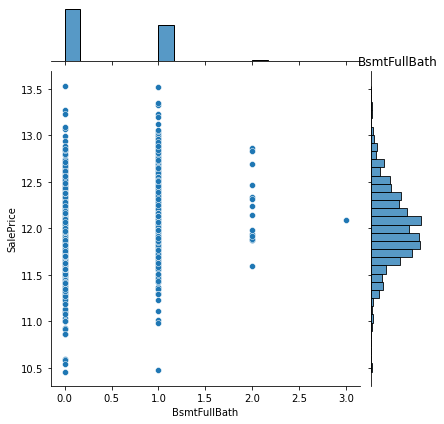

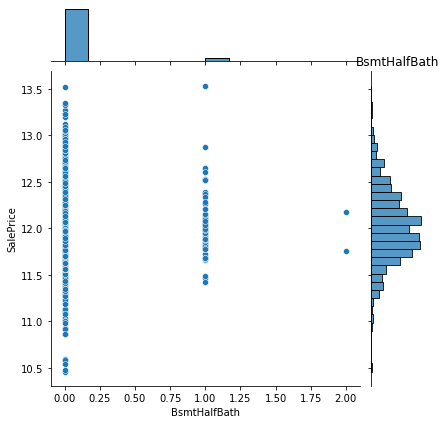

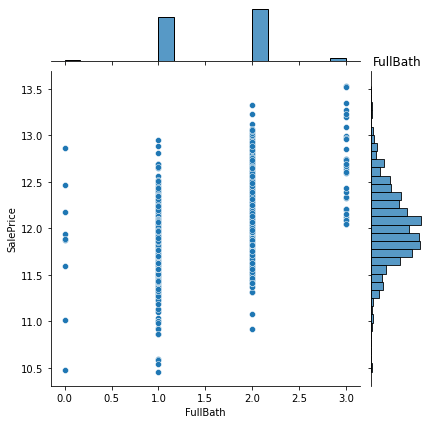

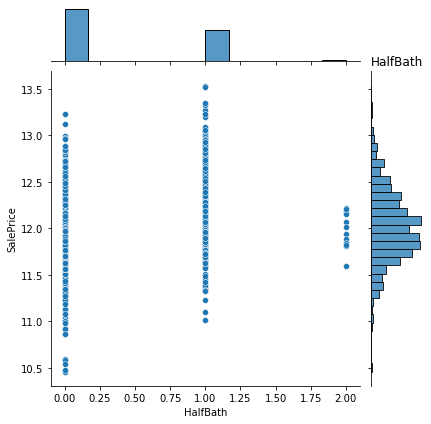

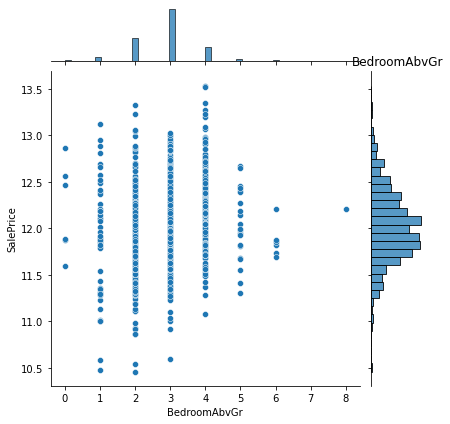

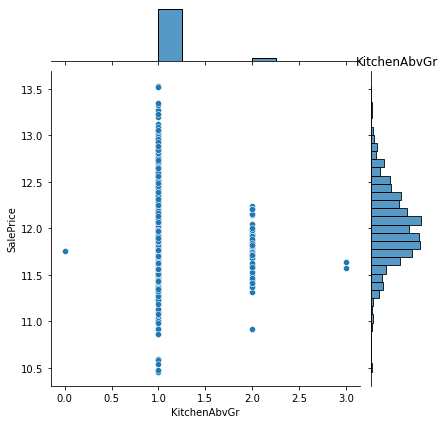

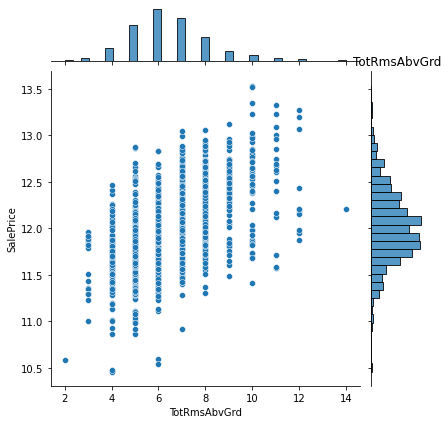

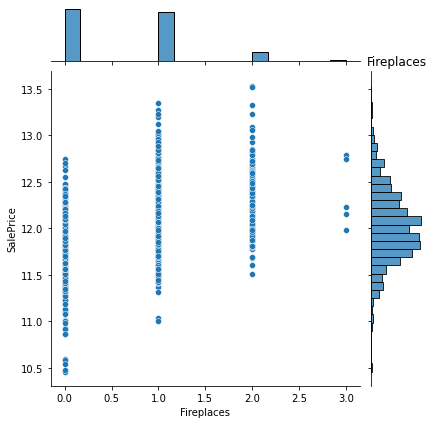

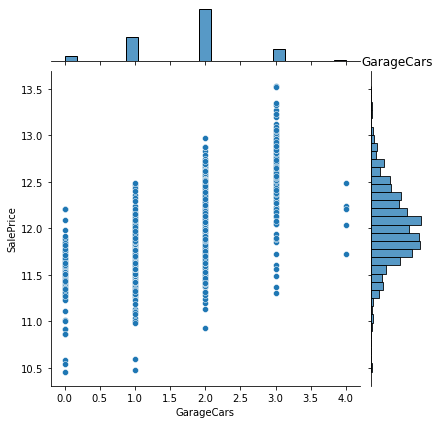

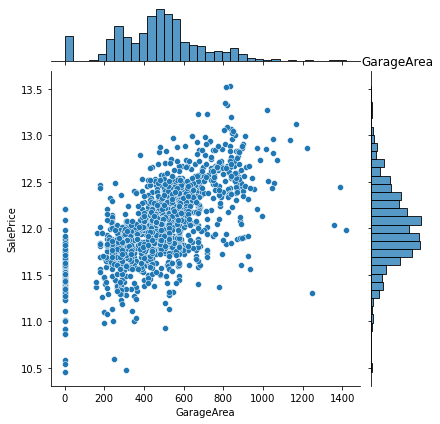

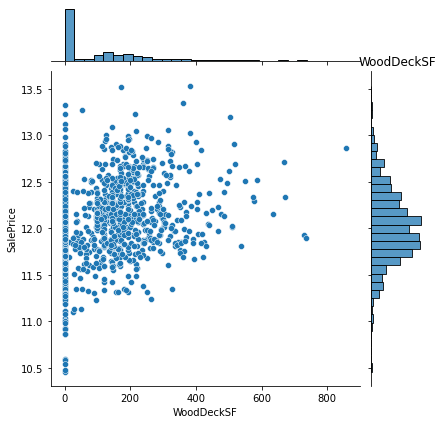

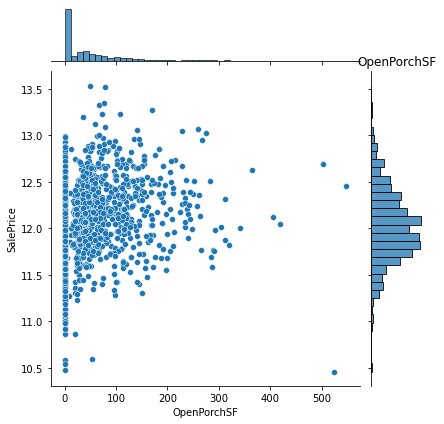

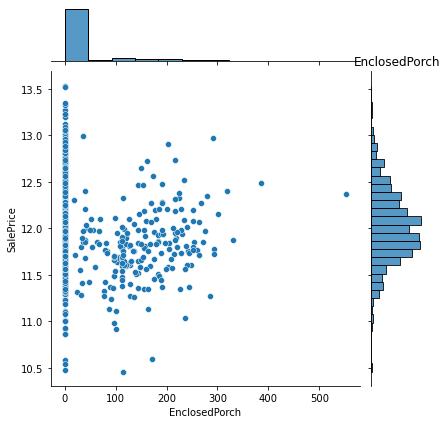

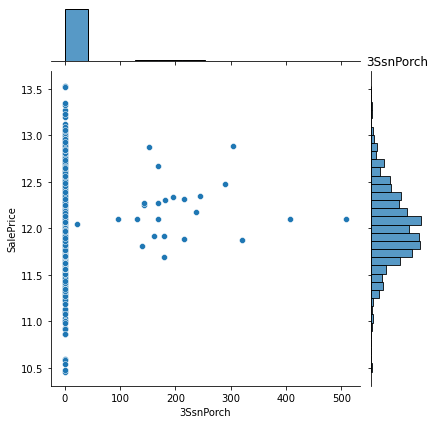

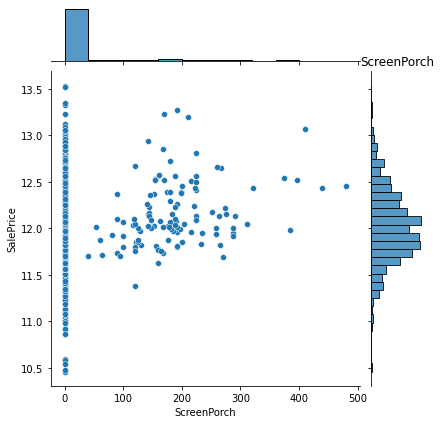

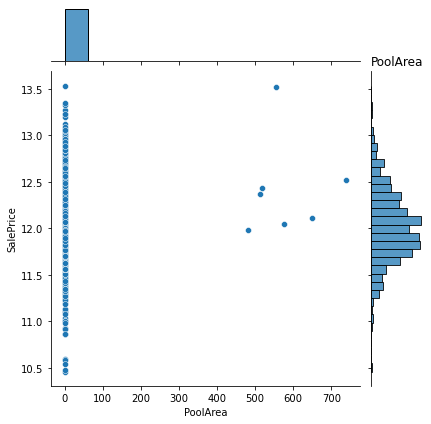

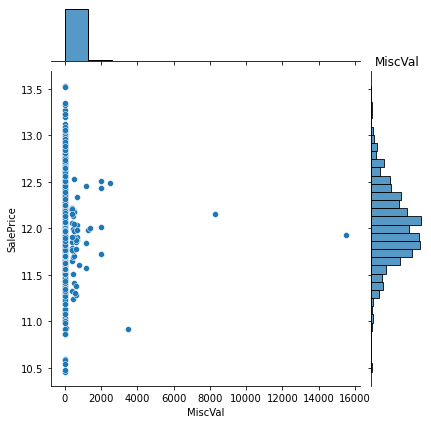

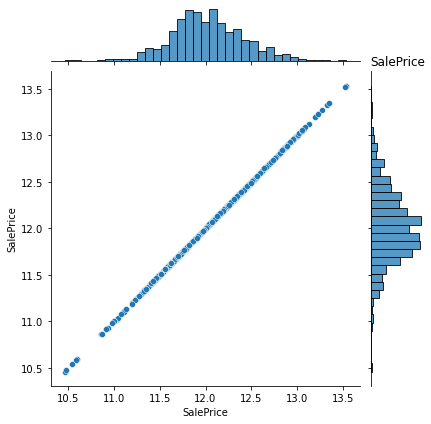

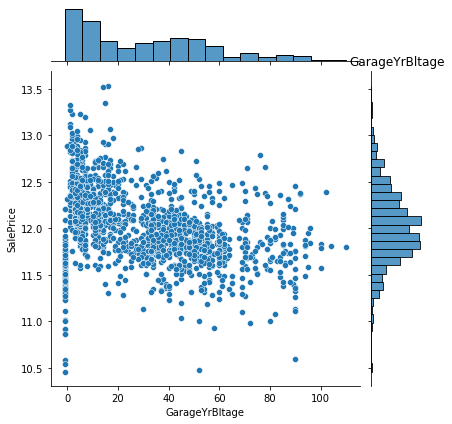

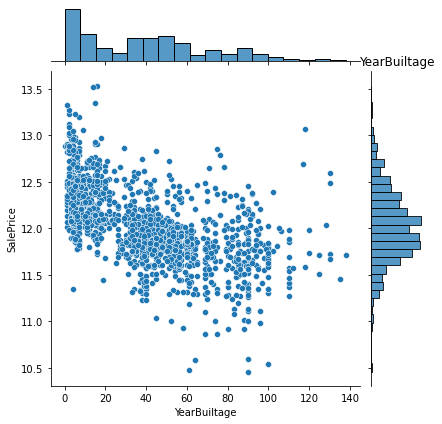

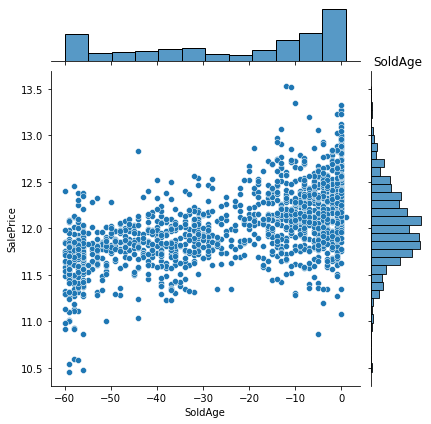

In [44]:
def joint_numerical(cols):
    plt.figure(figsize=(25, 45))
    count=1
    for i in cols:  
        sns.jointplot(x=i, y="SalePrice", data=sales_data)
        count+=1
        plt.title(i)
joint_numerical(numcols)


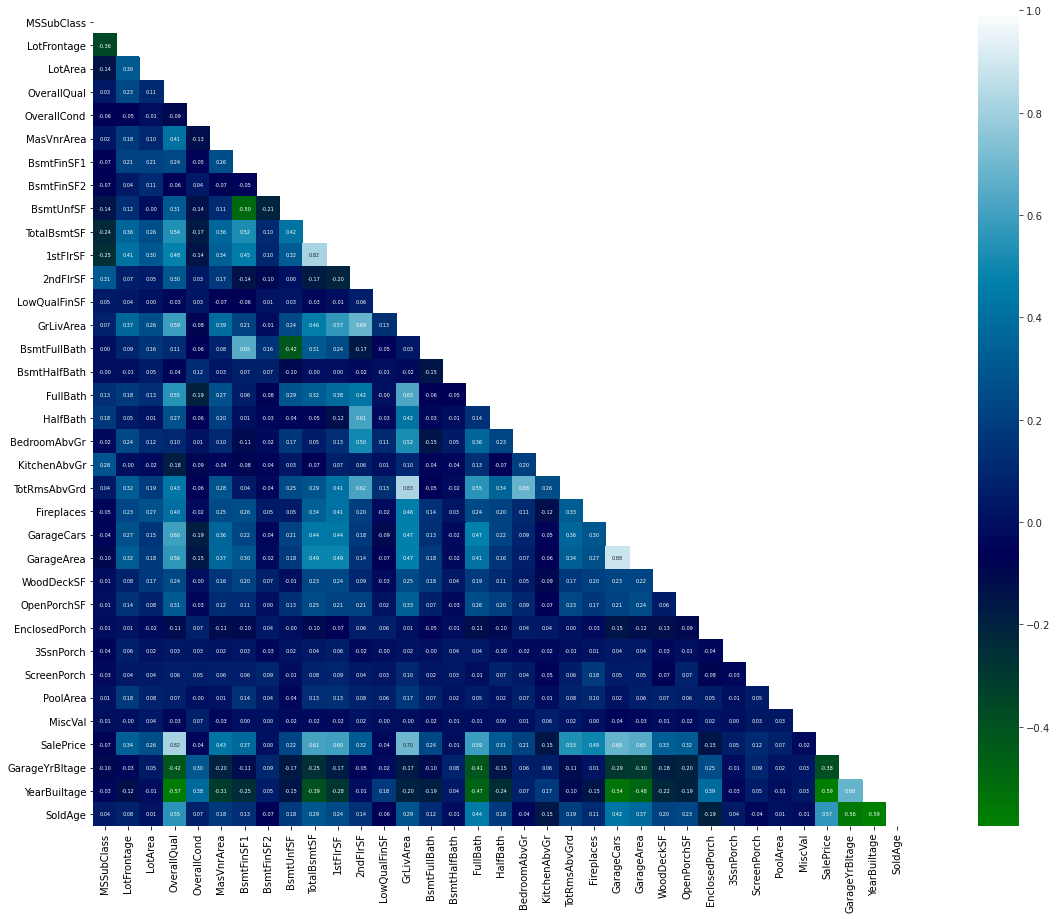

In [45]:
#Correlation matrix of columns

masklower = np.zeros_like(sales_data.corr()) #Masking values to get lower triangle
masklower[np.triu_indices_from(masklower)] = True
f, axes = plt.subplots(figsize =(25,15))
with sns.axes_style("white"):
    axes = sns.heatmap(sales_data.corr(),mask= masklower,annot=True, square =True ,vmax =1.0,annot_kws = {'size':5}, fmt=".2f", cmap ="ocean")
plt.show()

In [46]:
t1=sales_data.corr()
t1cor = t1.where(np.triu(np.ones(t1.shape), k=1).astype(np.bool))
t1cor = t1cor.unstack().reset_index()

t1cor.columns = ['Columnname1', 'Columnname2', 'CorrelationValue']
t1cor.dropna(subset = ['CorrelationValue'], inplace = True)
t1cor = t1cor.sort_values('CorrelationValue', ascending = False).reset_index(drop = True)
t1cor['Correlationabs'] = abs(t1cor['CorrelationValue'])
t1cor = t1cor.sort_values('Correlationabs', ascending = False)
##### Top 10 Correlation columns frame
t1cor[:20]

,Columnname1,Columnname2,CorrelationValue,Correlationabs
0,GarageArea,GarageCars,0.882613,0.882613
1,TotRmsAbvGrd,GrLivArea,0.825576,0.825576
2,1stFlrSF,TotalBsmtSF,0.819393,0.819393
3,SalePrice,OverallQual,0.817368,0.817368
4,SalePrice,GrLivArea,0.700941,0.700941
5,GrLivArea,2ndFlrSF,0.687726,0.687726
6,SalePrice,GarageCars,0.680645,0.680645
7,YearBuiltage,GarageYrBltage,0.676821,0.676821
8,TotRmsAbvGrd,BedroomAbvGr,0.676613,0.676613
9,SalePrice,GarageArea,0.650916,0.650916


In [47]:
t1cor[:40]

,Columnname1,Columnname2,CorrelationValue,Correlationabs
0,GarageArea,GarageCars,0.882613,0.882613
1,TotRmsAbvGrd,GrLivArea,0.825576,0.825576
2,1stFlrSF,TotalBsmtSF,0.819393,0.819393
3,SalePrice,OverallQual,0.817368,0.817368
4,SalePrice,GrLivArea,0.700941,0.700941
5,GrLivArea,2ndFlrSF,0.687726,0.687726
6,SalePrice,GarageCars,0.680645,0.680645
7,YearBuiltage,GarageYrBltage,0.676821,0.676821
8,TotRmsAbvGrd,BedroomAbvGr,0.676613,0.676613
9,SalePrice,GarageArea,0.650916,0.650916


<span style="color : green"><p>
##Inferences
    
1.Correlations: 
    
GarageCars and GarageArea (0.88)
    
TotRmsAbvGrd and GrLivArea (0.83)
    
TotalBsmtSF and 1stflrSF (0.82)
    
Let us drop high correlated to be excluded in model tuning

2.Floating Village Residential and Residential Low Density Zone area found to have high sales at higher prices.

3.Hillside - Significant slope from side to side, good quarters or  Excellent condition facilities provided has highest average saleprice with good demand.

4.Finished and New built/less age possesed high demand at high average price stake.
    </p></span>

In [48]:

print(f"Shape of Dataframe: {sales_data.shape}")

Shape of Dataframe: (1459, 76)


### <p> <span style='color:darkred'> <i> Subtask 1.2.5 Dummy Encoding </i>  </p> </span>


In [49]:
#categorical
catcols= sales_data.select_dtypes(include='object').columns.to_list()
catcols.append("MSSubClass")

In [50]:
sales_data[catcols].nunique()


MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
Fence             5
SaleType          9
SaleCondition     6
MSSubClass       15
dtype: int64

In [51]:
#Label enconding column values sorted in ordered 
cols=["LotShape",  "LandSlope", "HouseStyle", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual","Functional","FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "CentralAir" ]

    
sales_data['LotShape'] = sales_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})    
sales_data['LandSlope'] = sales_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
sales_data["HouseStyle"]= sales_data.HouseStyle.map({ '1Story': 0,'1.5Unf': 1,'1.5Fin': 2,'2Story': 3,  '2.5Unf': 4,'2.5Fin': 5, 'SFoyer': 6, 'SLvl': 7})
sales_data['ExterQual'] = sales_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
sales_data['ExterCond'] = sales_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
sales_data['BsmtQual'] = sales_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
sales_data['BsmtCond'] = sales_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
sales_data['BsmtExposure'] = sales_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
sales_data['BsmtFinType1'] = sales_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
sales_data['BsmtFinType2'] = sales_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
sales_data['HeatingQC'] = sales_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
sales_data['CentralAir'] = sales_data.CentralAir.map({'N':0,'Y':1})
sales_data['KitchenQual'] = sales_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
sales_data["Functional"] = sales_data.Functional.map({ 'Typ': 0,'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5,  'Sev': 6,'Sal':7})
sales_data['FireplaceQu'] = sales_data.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
sales_data['GarageFinish'] = sales_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
sales_data['GarageQual'] = sales_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
sales_data['GarageCond'] = sales_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


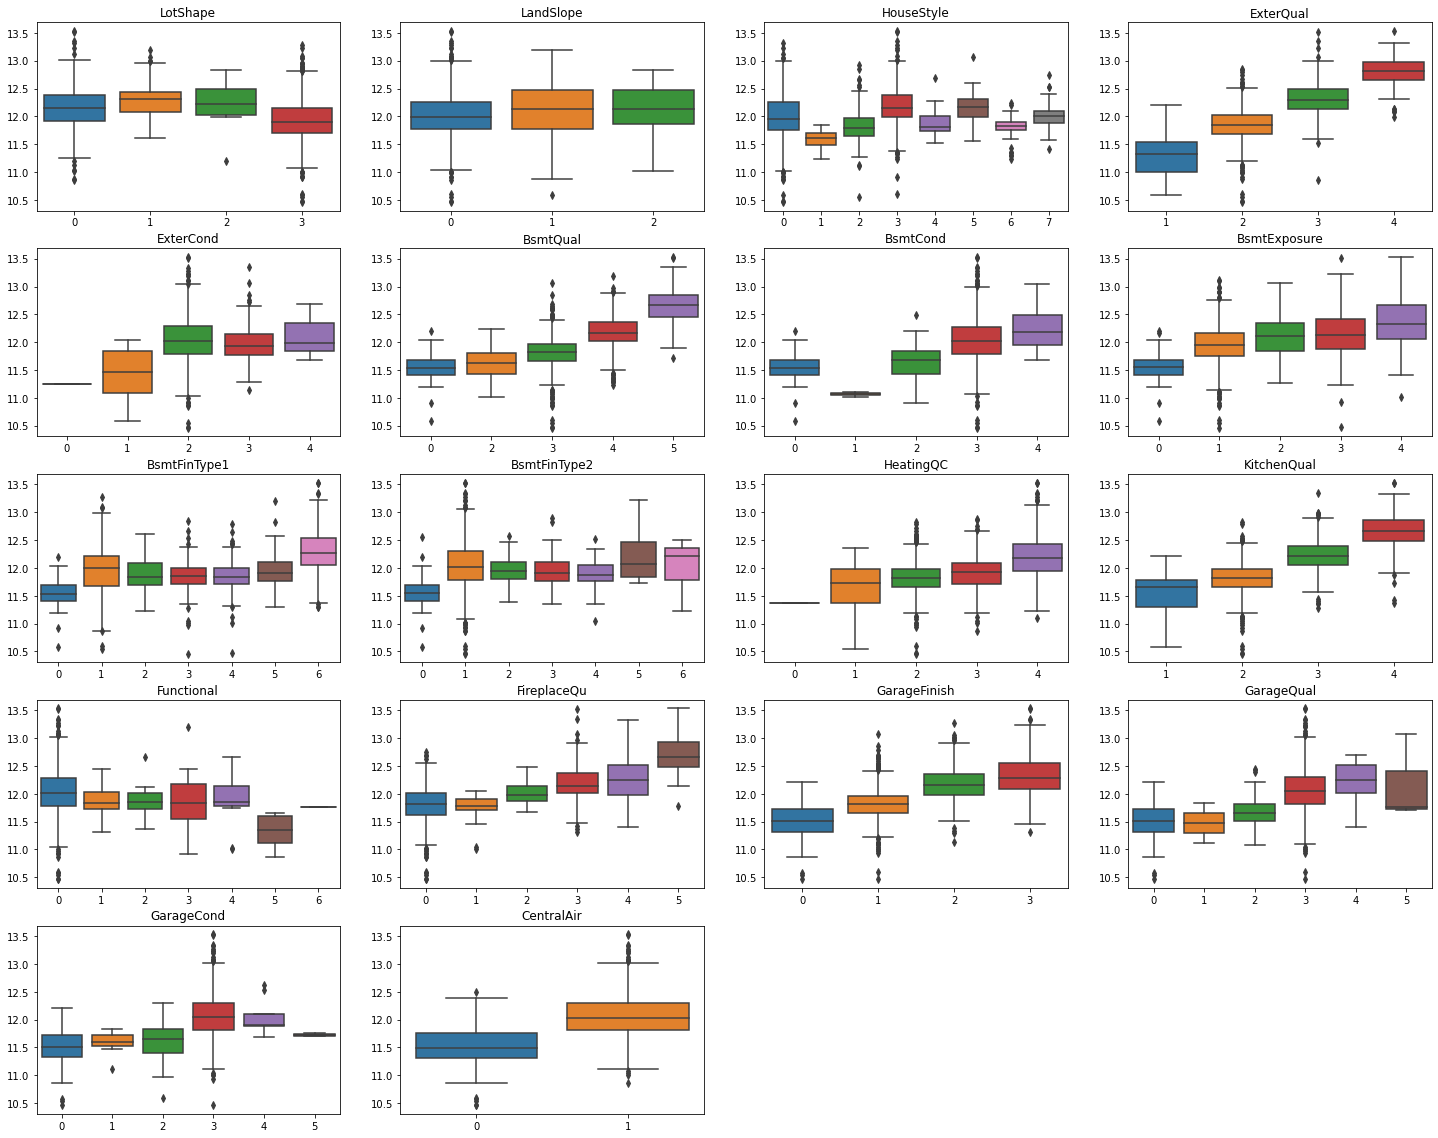

In [52]:
box_categorical(cols)

In [53]:
cols_n=[x for x in catcols if x not in cols]
cols_n
sales_data[cols_n].nunique()


MSZoning          5
Street            2
Alley             3
LandContour       4
Utilities         2
LotConfig         5
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
Foundation        6
Heating           6
Electrical        5
GarageType        7
PavedDrive        3
Fence             5
SaleType          9
SaleCondition     6
MSSubClass       15
dtype: int64

In [54]:
#One_hot enconding on remaining columns
df = pd.get_dummies(sales_data[cols_n], drop_first=True)
df.head()

,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
 # we shall drop first to avoid multicolinearity
sales_data = pd.concat([sales_data,df],axis=1)
sales_data.drop(cols_n,axis=1,inplace = True)
print("Shape of DataFrame: {}".format(sales_data.shape))


Shape of DataFrame: (1459, 193)


### <p> <span style="color : darkred"> <i> Subtask 2.1 Train and Test Data Split </i></span></p>


In [56]:
# Splitting the data into train and test:
np.random.seed(0)
X = sales_data.drop(['SalePrice'], axis=1)
y = sales_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)

X train shape (1021, 192)
X test shape (438, 192)


### <p> <span style="color : darkred"> <i> Subtask 2.2 Feature Scaling </i></span></p>


In [57]:
X_train.head()

,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBltage,YearBuiltage,SoldAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,75.0,10125,3,0,2,5,5,0.0,2,2,0,0,0,0,0,0,0,0,0,2,1,1302,432,0,1734,0,0,2,0,4,2,3,8,0,0,0,1,2,539,3,3,0,0,0,0,0,0,0,33,33,-32,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1416,60.0,11340,3,0,3,4,6,0.0,2,2,3,3,1,1,0,1,0,777,777,3,1,1246,1044,0,2290,0,0,2,0,4,2,2,11,0,0,0,1,2,560,3,3,0,0,114,0,0,0,0,39,125,-60,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
390,50.0,8405,3,0,2,5,8,0.0,2,2,3,4,1,3,241,4,391,229,861,4,1,961,406,0,1367,1,0,1,0,4,1,2,7,0,0,0,1,1,384,3,3,0,130,112,0,0,0,0,32,110,-58,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1

In [58]:
cols=X_train.columns
cols

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'HouseStyle',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=192)

In [59]:
scaler=StandardScaler()
# numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[cols]=scaler.fit_transform(X_train[cols])

In [60]:
X_train.head()

,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBltage,YearBuiltage,SoldAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.223202,-0.049244,0.748337,-0.218919,0.160054,-0.790233,-0.512364,-0.555819,-0.696415,-0.250859,-3.770417,-4.885474,-1.513917,-1.661001,-0.931228,-1.325790,-0.299629,-1.265589,-2.274081,-1.175783,0.285601,0.320038,0.206085,-0.123208,0.399579,-0.826986,-0.241465,0.789648,-0.755902,1.399721,4.407570,0.730270,0.917605,-0.234182,-0.963636,-1.027939,-0.818813,0.302190,0.302095,0.271518,0.266803,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.122036,-0.195445,-0.409713,-0.219669,-0.099454,0.524077,-0.423065,0.076885,0.265011,-0.164812,-0.179878,-0.16165,0.333152,-0.031311,-0.267121,-0.17399,-0.044302,0.635926,-0.031311,-0.10436,-0.20454,-0.137703,-0.312809,-0.185601,-0.281569,-0.245415,-0.167921,-0.10436,5.156995,-0.429482,-0.070152,-0.222108,-0.17399,-0.243164,-0.291575,-0.133963,-0.219669,-0.207125,-0.260752,-0.126176,-0.155152,-0.099454,-0.243164,0.401929,-0.076885,-0.113564,-0.088867,-0.133963,-0.044302,-0.054286,-0.070152,0.099454,-0.031311,-0.044302,0.0,0.0,-0.

In [61]:
X_test[cols]=scaler.transform(X_test[cols])


In [62]:
X_test.head()

,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBltage,YearBuiltage,SoldAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,-0.050978,0.149840,-1.383901,-0.218919,0.665985,-0.079997,2.179524,0.278274,-0.696415,-0.250859,-0.518154,-1.535528,2.127330,-0.720412,0.268446,-0.280515,-0.299629,-0.677906,-0.489854,-0.143561,0.285601,-0.497053,1.764679,-0.123208,1.066085,-0.826986,-0.241465,0.789648,1.269756,2.619102,-0.207947,0.730270,1.538462,-0.234182,-0.963636,-1.027939,1.413517,0.302190,-0.138095,0.271518,0.266803,0.309921,1.684096,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.556728,0.164871,1.118212,-0.219669,-0.099454,0.524077,-0.423065,0.076885,0.265011,-0.164812,-0.179878,6.186213,-3.001634,-0.031311,-0.267121,-0.17399,-0.044302,0.635926,-0.031311,-0.10436,-0.20454,7.262014,-0.312809,-0.185601,-0.281569,-0.245415,-0.167921,-0.10436,-0.193911,-0.429482,-0.070152,-0.222108,-0.17399,-0.243164,-0.291575,-0.133963,-0.219669,-0.207125,-0.260752,-0.126176,-0.155152,-0.099454,-0.243164,0.401929,-0.076885,-0.113564,-0.088867,-0.133963,-0.044302,-0.054286,-0.070152,0.099454,-0.031311,-0.044302,0.0,0.0,-0.03131

### Feature selection using RFE

## Model1 

In [63]:
#Building model1 with 90 features
def RFE_frame(variable_count):
    lm = LinearRegression()  # Instantiating
    lm.fit(X_train, y_train)
    rfe = RFE(lm, variable_count)  # running RFE with  variables as output
    rfe = rfe.fit(X_train, y_train)
    rfe_frame= pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
    rfe_frame.columns = ['Column_Names','Status','Rank']
    return rfe_frame
rfe_frame= RFE_frame(90)

In [64]:
rfe_frame.loc[rfe_frame.Status==True].sort_values("Rank")

,Column_Names,Status,Rank
0,LotFrontage,True,1
123,Exterior1st_BrkFace,True,1
122,Exterior1st_BrkComm,True,1
120,RoofMatl_WdShngl,True,1
119,RoofMatl_WdShake,True,1
...,...,...,...
38,GarageArea,True,1
37,GarageCars,True,1
35,FireplaceQu,True,1
32,TotRmsAbvGrd,True,1


In [65]:
rfe_true = list(rfe_frame[rfe_frame.Status==True].Column_Names)
rfe_true

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'ExterCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'ScreenPorch',
 'GarageYrBltage',
 'YearBuiltage',
 'SoldAge',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_Pave',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'RoofMa

In [66]:
global X_train_rfe1,X_test_rfe1
X_train_rfe1 = X_train[rfe_true]
X_test_rfe1 = X_test[rfe_true]

In [67]:
def simple_model_summary(rfe_true):  
    global X_train_rfe1,X_test_rfe1
    
    X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
    X_train_rfe1.head()
    lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
    print(lm1.summary())
simple_model_summary(rfe_true)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     185.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:29:42   Log-Likelihood:                 934.80
No. Observations:                1021   AIC:                            -1702.
Df Residuals:                     937   BIC:                            -1288.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [68]:
# Calculate the VIFs for model
def vif_calculation():
    global X_train_rfe1,X_test_rfe1
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe1.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif
vif_model1=vif_calculation()
vif_model1.sort_values(by=["VIF"],ascending=False).query("VIF>2")

,Features,VIF
90,SaleCondition_Partial,inf
8,BsmtFinSF1,inf
17,GrLivArea,inf
16,LowQualFinSF,inf
15,2ndFlrSF,inf
14,1stFlrSF,inf
11,TotalBsmtSF,inf
9,BsmtFinSF2,inf
10,BsmtUnfSF,inf
72,Exterior2nd_CBlock,inf


In [69]:
#correlation on Xtrain
t1=X_train.corr()
t1cor = t1.where(np.triu(np.ones(t1.shape), k=1).astype(np.bool))
t1cor = t1cor.unstack().reset_index()

t1cor.columns = ['Columnname1', 'Columnname2', 'CorrelationValue']
t1cor.dropna(subset = ['CorrelationValue'], inplace = True)
t1cor = t1cor.sort_values('CorrelationValue', ascending = False).reset_index(drop = True)
t1cor['Correlationabs'] = abs(t1cor['CorrelationValue'])
t1cor = t1cor.sort_values('Correlationabs', ascending = False)
##### Top 10 Correlation columns frame
t1cor[:20]

,Columnname1,Columnname2,CorrelationValue,Correlationabs
0,Exterior2nd_CBlock,Exterior1st_CBlock,1.000000,1.000000
1,SaleCondition_Partial,SaleType_New,1.000000,1.000000
2,Exterior2nd_CmentBd,Exterior1st_CemntBd,0.976249,0.976249
3,Exterior2nd_VinylSd,Exterior1st_VinylSd,0.976055,0.976055
4,Exterior2nd_MetalSd,Exterior1st_MetalSd,0.973897,0.973897
5,GarageCond,GarageQual,0.959928,0.959928
17390,GarageType_NA,GarageQual,-0.947683,0.947683
17389,GarageType_NA,GarageCond,-0.946690,0.946690
17388,RoofStyle_Hip,RoofStyle_Gable,-0.930290,0.930290
6,GarageArea,GarageCars,0.885722,0.885722


In [70]:
# colinear_cols=["SaleCondition_Partial","Exterior1st_CBlock","TotalBsmtSF","GrLivArea","RoofMatl_CompShg","MSZoning_RL","MasVnrType_None","GarageCars","1stFlrSF","YearBuiltage","Foundation_PConc"]
colinear_cols=["SaleCondition_Partial","Exterior1st_CBlock","BsmtFinSF2","GrLivArea","RoofMatl_CompShg","MSZoning_RL","MasVnrType_None","Exterior2nd_CmentBd","GarageType_NA","TotalBsmtSF","GarageCars","1stFlrSF","YearBuiltage","Exterior1st_Wd Sdng"]
len(colinear_cols)

14

In [71]:
# validated manually droppping some of  following  high multicolinearity  features
X_train_rfe1.drop(colinear_cols,axis=1,inplace=True)
vif_model1=vif_calculation()
vif_model1.sort_values(by=["VIF"],ascending=False).query("VIF>2")

,Features,VIF
40,Neighborhood_Somerst,4.41
28,MSZoning_FV,4.37
12,2ndFlrSF,4.30
3,OverallQual,4.11
69,Heating_GasA,4.10
8,BsmtFinSF1,3.98
19,TotRmsAbvGrd,3.41
70,Heating_GasW,3.22
26,GarageYrBltage,3.21
22,GarageArea,3.05


The infinite VIF is due to multicolinearity among the features, therefore let us go through regularisation and obtain decent complex model.

## Ridge Regression

In [72]:
X_train.drop(colinear_cols,axis=1,inplace=True)
X_test.drop(colinear_cols,axis=1,inplace=True)
print("X_train Shape of DataFrame: {}".format(X_train.shape))
print("X_test Shape of DataFrame: {}".format(X_test.shape))

rfe_frame= RFE_frame(90)
rfe_true = list(rfe_frame[rfe_frame.Status==True].Column_Names)
rfe_true
print(len(rfe_true))

X_train Shape of DataFrame: (1021, 178)
X_test Shape of DataFrame: (438, 178)
90


In [73]:
# Basic Ridge regression model
global X_train_regr,X_test_regr,ridge
def Ridge_model(columns,alpha_val):
    global X_train_regr,X_test_regr,ridge
    ridge = Ridge(alpha=alpha_val)
    X_train_regr=X_train[columns]
    X_test_regr=X_test[columns]
    ridge.fit(X_train_regr,y_train)
    y_train_pred = ridge.predict(X_train_regr)
    print("R2 score for Train:", round(r2_score(y_train, y_train_pred),2))
    y_test_pred=ridge.predict(X_test_regr)
    print("R2 score for Test:", round(r2_score(y_test, y_test_pred),2))

Ridge_model(rfe_true,0.001)    
    
# print(X_train_regr)


R2 score for Train: 0.91
R2 score for Test: 0.86


In [74]:
global ridge
def grid_ridge_modeltune():
    # list of alphas to tune
    global X_train_regr,X_test_regr,ridge
    params = {'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,500, 1000]}
    # Build model using Ridge regression
    ridge = Ridge()
    print(len(X_train_regr.columns))
    # cross validation
    folds = 5
    model_cv = GridSearchCV(estimator = ridge, 
                            param_grid = params, 
                            scoring= 'neg_mean_absolute_error', 
                            cv = folds, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(X_train_regr, y_train)

    return model_cv
model_grid_rmt=grid_ridge_modeltune()
model_grid_rmt
# print(ridge)

90
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

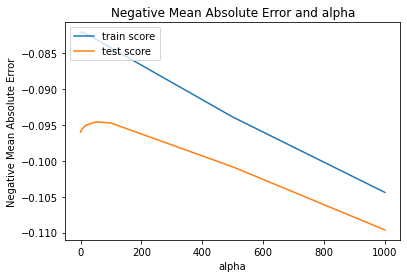

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.082079,-0.095993
1,{'alpha': 0.001},-0.082079,-0.095993
2,{'alpha': 0.01},-0.082079,-0.095992
3,{'alpha': 0.05},-0.082079,-0.095988
4,{'alpha': 0.1},-0.082079,-0.095983


In [75]:
def model_param_graph(model_cv): 
    cv_results = pd.DataFrame(model_cv.cv_results_)
    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
    return cv_results
cv_grid_rmt=model_param_graph(model_grid_rmt)
cv_grid_rmt[['params', 'mean_train_score', 'mean_test_score']].head()

In [76]:
# Finding out the best score and Optimum value of alpha
def best_alpha_val(model_cv):
    print(model_cv.best_estimator_)
    best_ridge_score = model_cv.best_score_
    best_ridge_alpha = model_cv.best_params_["alpha"]
    print("The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))
    return best_ridge_alpha
best_ridge_alpha=best_alpha_val(model_grid_rmt)

Ridge(alpha=50)
The best r2 score is obtained at alpha 50


In [77]:
#Final Ridge Model with alpha obtained
Ridge_model(rfe_true,best_ridge_alpha)    

R2 score for Train: 0.91
R2 score for Test: 0.87


In [78]:
# Coefficients for Final Ridge  Model
def ridge_coeficients():
    global ridge,X_train_regr
    print(ridge)
    model_parameter = list(ridge.coef_)
    model_parameter.insert(0,ridge.intercept_)
    model_parameter = [x for x in model_parameter]
    cols = X_train_regr.columns
    print(len(cols))
    cols.insert(0,'const')
    ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
    ridge_coef.columns = ['Feature','Coefficient']
    return ridge_coef

ridge_coef_md1=ridge_coeficients()
ridge_coef_md1.reindex(ridge_coef_md1.Coefficient.abs().sort_values(ascending = False).index).head(20)
    

Ridge(alpha=50)
90


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.075588
20,Functional,0.052939
23,GarageQual,0.042965
16,HalfBath,0.042904
14,BsmtFullBath,0.035009
9,BsmtFinType2,0.033615
48,Neighborhood_OldTown,0.033015
4,ExterCond,0.032333
45,Neighborhood_MeadowV,-0.031255


In [79]:
vif_model1=vif_calculation()
vif_model1

,Features,VIF
0,const,1.00
1,LotFrontage,1.95
2,LotArea,1.48
3,OverallQual,4.11
4,OverallCond,1.89
...,...,...
72,GarageType_Attchd,1.83
73,Fence_GdWo,1.09
74,SaleType_ConLD,1.14
75,SaleType_New,2.41


## Lasso Regression

In [80]:
#Final Lasso Model with alpha obtained
def Lasso_model(columns,alpha_val):
    global X_train_regr,X_test_regr,lasso
    X_train_regr=X_train[columns]
    X_test_regr=X_test[columns]
    lasso = Lasso(alpha=alpha_val)
    lasso.fit(X_train_regr, y_train)
    y_pred_ltrain=lasso.predict(X_train_regr)
    print("R2 score for Train:", round(r2_score(y_train, y_pred_ltrain),2))
    y_pred_ltest=lasso.predict(X_test_regr)
    print("R2 score for Test:", round(r2_score(y_test, y_pred_ltest),2))
Lasso_model(rfe_true,0.1)    


R2 score for Train: 0.66
R2 score for Test: 0.66


In [81]:

def grid_lasso_modeltune():
    global X_train_regr,X_test_regr,lasso
    params = {'alpha': [0.00001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
    lasso = Lasso()
    # cross validation
    folds = 5
    model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                            cv = folds, return_train_score=True, verbose = 1)            

    model_cv.fit(X_train_regr, y_train) 
    print(len(X_train_regr.columns))
    return model_cv

model_grid_lmt=grid_lasso_modeltune()
model_grid_lmt   

Fitting 5 folds for each of 30 candidates, totalling 150 fits
90


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

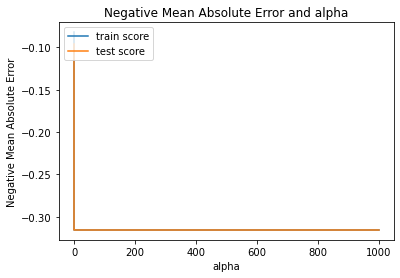

,params,mean_train_score,mean_test_score
0,{'alpha': 1e-05},-0.082075,-0.095981
1,{'alpha': 1e-05},-0.082075,-0.095981
2,{'alpha': 0.0001},-0.082055,-0.095904
3,{'alpha': 0.001},-0.082839,-0.095957
4,{'alpha': 0.01},-0.097315,-0.105370


In [82]:
cv_grid_lmt=model_param_graph(model_grid_lmt)
cv_grid_lmt[['params', 'mean_train_score', 'mean_test_score']].head()

In [83]:
best_ridge_alpha=best_alpha_val(model_grid_lmt)

Lasso(alpha=0.0001)
The best r2 score is obtained at alpha 0.0001


In [84]:
Lasso_model(rfe_true,best_ridge_alpha)  

R2 score for Train: 0.91
R2 score for Test: 0.86


In [85]:
# Coefficients for Final Lasso  Model
def lasso_coeficients():
    global lasso,X_train_regr
    print(lasso)
    model_parameter = list(lasso.coef_)
    model_parameter.insert(0,lasso.intercept_)
    model_parameter = [(x) for x in model_parameter]
    cols = X_train_regr.columns
    cols.insert(0,'const')
    lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
    lasso_coef.columns = ['Feature','Coefficient']
    return lasso_coef

lasso_coef_md1=lasso_coeficients()
lasso_coef_md1.reindex(lasso_coef_md1.Coefficient.abs().sort_values(ascending = False).index).head(20)
    

Lasso(alpha=0.0001)


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.080145
20,Functional,0.052564
23,GarageQual,0.044827
16,HalfBath,0.043894
14,BsmtFullBath,0.040193
9,BsmtFinType2,0.038144
11,HeatingQC,0.037607
45,Neighborhood_MeadowV,-0.036827
24,GarageCond,0.036426


## Model 2

In [86]:
# Building model2 with 70 features
rfe_frame= RFE_frame(70)
rfe_true = list(rfe_frame[rfe_frame.Status==True].Column_Names)
print(len(rfe_true))
# simple_model_summary(rfe_true)

70


### Ridge

R2 score for Train: 0.91
R2 score for Test: 0.86
70
Fitting 5 folds for each of 28 candidates, totalling 140 fits


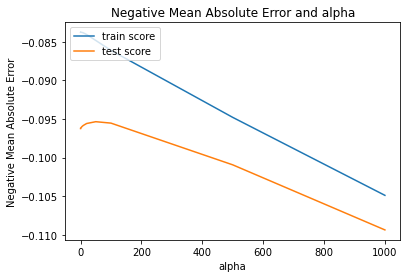

Ridge(alpha=50)
The best r2 score is obtained at alpha 50
R2 score for Train: 0.91
R2 score for Test: 0.87
Ridge(alpha=50)
70


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.076665
19,Functional,0.050882
22,GarageQual,0.044934
15,HalfBath,0.043976
8,BsmtFinType2,0.034234
13,BsmtFullBath,0.034127
10,HeatingQC,0.032835
43,Neighborhood_OldTown,0.030804
40,Neighborhood_MeadowV,-0.030378


In [87]:
# simple_model_summary(rfe_true)
Ridge_model(rfe_true,0.001)    
model_grid_rmt=grid_ridge_modeltune()
model_grid_rmt
cv_grid_rmt=model_param_graph(model_grid_rmt)
cv_grid_rmt[['params', 'mean_train_score', 'mean_test_score']].head()
best_ridge_alpha=best_alpha_val(model_grid_rmt)
Ridge_model(rfe_true,best_ridge_alpha) 
ridge_coef_md2=ridge_coeficients()
ridge_coef_md2.reindex(ridge_coef_md2.Coefficient.abs().sort_values(ascending = False).index).head(20)
   

### Lasso

R2 score for Train: 0.91
R2 score for Test: 0.87
Fitting 5 folds for each of 30 candidates, totalling 150 fits
70


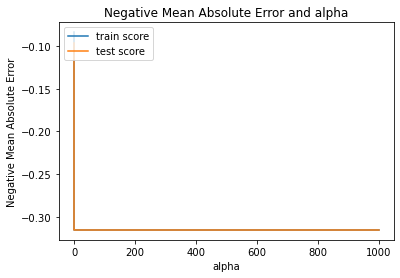

Lasso(alpha=0.0001)
The best r2 score is obtained at alpha 0.0001
R2 score for Train: 0.91
R2 score for Test: 0.86
Lasso(alpha=0.0001)


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.081753
19,Functional,0.050248
22,GarageQual,0.047304
15,HalfBath,0.044727
10,HeatingQC,0.039261
13,BsmtFullBath,0.039030
8,BsmtFinType2,0.038843
65,Foundation_Slab,0.037641
40,Neighborhood_MeadowV,-0.035019


In [88]:
Lasso_model(rfe_true,0.001)    
model_grid_lmt=grid_lasso_modeltune()
# model_grid_lmt
cv_grid_lmt=model_param_graph(model_grid_lmt)
cv_grid_lmt[['params', 'mean_train_score', 'mean_test_score']].head()
best_lasso_alpha=best_alpha_val(model_grid_lmt)
Lasso_model(rfe_true,best_lasso_alpha) 
lasso_coef_md2=lasso_coeficients()
lasso_coef_md2.reindex(lasso_coef_md2.Coefficient.abs().sort_values(ascending = False).index).head(20)
   

## Model3

In [89]:
# Building model 3 with 50 features
rfe_frame= RFE_frame(50)
rfe_true = list(rfe_frame[rfe_frame.Status==True].Column_Names)
print(len(rfe_true))
# simple_model_summary(rfe_true)


50


R2 score for Train: 0.9
R2 score for Test: 0.85
50
Fitting 5 folds for each of 28 candidates, totalling 140 fits


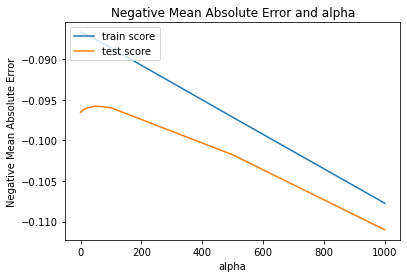

Ridge(alpha=50)
The best r2 score is obtained at alpha 50
R2 score for Train: 0.9
R2 score for Test: 0.86
Ridge(alpha=50)
50


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.086153
19,Functional,0.052523
15,HalfBath,0.046531
22,GarageQual,0.042186
8,BsmtFinType2,0.039632
10,HeatingQC,0.033263
4,BsmtQual,0.032622
21,GarageArea,0.032572
33,Neighborhood_MeadowV,-0.030682


In [90]:
# Ridge
# simple_model_summary(rfe_true)
Ridge_model(rfe_true,0.001)    
model_grid_rmt=grid_ridge_modeltune()
model_grid_rmt
cv_grid_rmt=model_param_graph(model_grid_rmt)
cv_grid_rmt[['params', 'mean_train_score', 'mean_test_score']].head()
best_ridge_alpha=best_alpha_val(model_grid_rmt)
Ridge_model(rfe_true,best_ridge_alpha) 
ridge_coef_md3=ridge_coeficients()
ridge_coef_md3.reindex(ridge_coef_md3.Coefficient.abs().sort_values(ascending = False).index).head(20)
   

R2 score for Train: 0.9
R2 score for Test: 0.85
Fitting 5 folds for each of 30 candidates, totalling 150 fits
50


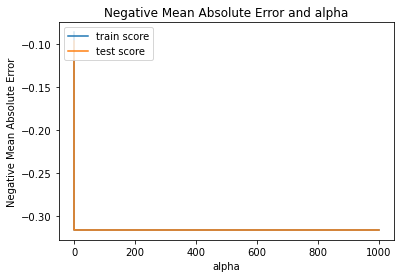

Lasso(alpha=0.0001)
The best r2 score is obtained at alpha 0.0001
best_lasso_alpha: 0.0001
R2 score for Train: 0.9
R2 score for Test: 0.85
Lasso(alpha=0.0001)


,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.093174
19,Functional,0.052178
15,HalfBath,0.047119
8,BsmtFinType2,0.044571
22,GarageQual,0.042666
10,HeatingQC,0.039260
47,Foundation_Slab,0.038477
4,BsmtQual,0.035463
46,Foundation_PConc,0.035197


In [91]:
# Lasso
Lasso_model(rfe_true,0.001)    
model_grid_lmt=grid_lasso_modeltune()
# model_grid_lmt
cv_grid_lmt=model_param_graph(model_grid_lmt)
cv_grid_lmt[['params', 'mean_train_score', 'mean_test_score']].head()
best_lasso_alpha=best_alpha_val(model_grid_lmt)
print("best_lasso_alpha:",best_lasso_alpha)
Lasso_model(rfe_true,best_lasso_alpha) 
lasso_coef_md2=lasso_coeficients()
lasso_coef_md2.reindex(lasso_coef_md2.Coefficient.abs().sort_values(ascending = False).index).head(20)


In [92]:
lasso_coef_md2.reindex(lasso_coef_md2.Coefficient.abs().sort_values(ascending = False).index)["Feature"].to_list()

['LotArea',
 'OverallCond',
 'Functional',
 'HalfBath',
 'BsmtFinType2',
 'GarageQual',
 'HeatingQC',
 'Foundation_Slab',
 'BsmtQual',
 'Foundation_PConc',
 'BsmtFullBath',
 'Neighborhood_MeadowV',
 'GarageArea',
 'Neighborhood_OldTown',
 'GarageCond',
 'KitchenAbvGr',
 'Neighborhood_Edwards',
 'BsmtFinType1',
 'FullBath',
 'Heating_GasW',
 'Neighborhood_NridgHt',
 'BsmtFinSF1',
 'BldgType_Twnhs',
 'Neighborhood_Somerst',
 'Exterior2nd_Wd Shng',
 'OverallQual',
 'SoldAge',
 'WoodDeckSF',
 'Neighborhood_NoRidge',
 'MSZoning_RM',
 'CentralAir',
 '2ndFlrSF',
 'Neighborhood_Crawfor',
 'TotRmsAbvGrd',
 'Neighborhood_ClearCr',
 'Condition2_PosN',
 'Condition1_Norm',
 'BldgType_TwnhsE',
 'Neighborhood_IDOTRR',
 'Neighborhood_StoneBr',
 'Exterior1st_BrkFace',
 'KitchenQual',
 'PoolArea',
 'HouseStyle',
 'BsmtExposure',
 'FireplaceQu',
 'Foundation_CBlock',
 'BsmtUnfSF',
 'SaleType_New',
 'Neighborhood_BrDale']

## Conclusions

Lasso Regression has provided highest accuracy and generalised model at faster rate. Out of three models model with 50 features provide same training and test accuracy at minimal number of features which shows optimal complex and decent model, therefore better is to analyze further and obtain good model with optimal complexity of features.

Difference rate between Train and Test accuracy lies within 5% which is efficient.

From top 30 features it is clearly evident that inferences drawn holds good, that is good or excellent condition and Finished facilities determines high sale price.

Final optimal value:
Ridge(alpha=50)
Lasso(alpha=0.0001)

In [93]:
# case 1: Doubling alpha
print(len(X_train_regr.columns))
ridge_new = Ridge(alpha=100.0)
ridge_new.fit(X_train_regr, y_train)
y_pred_ridge_new_train=ridge_new.predict(X_train_regr)
print("R2 score for Train:", round(r2_score(y_train, y_pred_ridge_new_train),2))
y_pred_ridge_new_test=ridge_new.predict(X_test_regr)
print("R2 score for Test:", round(r2_score(y_test, y_pred_ridge_new_test),2))

50
R2 score for Train: 0.9
R2 score for Test: 0.86


In [94]:
model_parameter = list(ridge_new.coef_)
model_parameter.insert(0,ridge_new.intercept_)
cols = X_train_regr.columns
cols.insert(0,'const')
ridge_new_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_new_coef.columns = ['Features','Coefficient']
# ridge_new_coef.sort_values(by='Coefficient',ascending=False).head(20)
ridge_new_coef.reindex(ridge_new_coef.Coefficient.abs().sort_values(ascending = False).index).head(20)
 

,Features,Coefficient
0,LotArea,12.028787
3,OverallCond,0.081056
19,Functional,0.052076
15,HalfBath,0.045623
22,GarageQual,0.041545
8,BsmtFinType2,0.036698
21,GarageArea,0.033884
4,BsmtQual,0.030208
10,HeatingQC,0.029487
33,Neighborhood_MeadowV,-0.028687


In [95]:
#Lasso

lasso_new = Lasso(alpha=0.0002)
lasso_new.fit(X_train_regr, y_train)
y_pred_ltrain=lasso_new.predict(X_train_regr)
print("R2 score for Train:", round(r2_score(y_train, y_pred_ltrain),2))
y_pred_ltest=lasso_new.predict(X_test_regr)
print("R2 score for Test:", round(r2_score(y_test, y_pred_ltest),2))

R2 score for Train: 0.9
R2 score for Test: 0.85


In [96]:
# Coefficients for Final Lasso  Model

model_parameter = list(lasso_new.coef_)
model_parameter.insert(0,lasso.intercept_)
model_parameter = [(x) for x in model_parameter]
cols = X_train_regr.columns
cols.insert(0,'const')
lasso_new_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_new_coef.columns = ['Feature','Coefficient']
lasso_new_coef.reindex(lasso_new_coef.Coefficient.abs().sort_values(ascending = False).index).head(30)
#lassp aplha=0.001

,Feature,Coefficient
0,LotArea,12.028787
3,OverallCond,0.093488
19,Functional,0.052237
15,HalfBath,0.047069
8,BsmtFinType2,0.044230
22,GarageQual,0.042719
10,HeatingQC,0.038698
47,Foundation_Slab,0.037788
4,BsmtQual,0.035346
46,Foundation_PConc,0.034255


In [97]:
top5_columns=lasso_coef_md2.reindex(lasso_coef_md2.Coefficient.abs().sort_values(ascending = False).index)["Feature"].to_list()[:5]
top5_columns

['LotArea', 'OverallCond', 'Functional', 'HalfBath', 'BsmtFinType2']

In [98]:
# case2:Removing first 5 features
X_train.drop(top5_columns,axis=1,inplace=True)
X_test.drop(top5_columns,axis=1,inplace=True)


In [99]:
rfe_frame= RFE_frame(50)
rfe_true = list(rfe_frame[rfe_frame.Status==True].Column_Names)
print(len(rfe_true))
rfe_true=[x for x in rfe_true if x not in (top5_columns)]
# simple_model_summary(rfe_true)
X_train_regr_new=X_train[rfe_true]
X_test_regr_new=X_test[rfe_true]
print(len(X_train_regr_new.columns))

50
50


In [100]:
#ridge
print(len(X_train_regr_new.columns))
ridge_new = Ridge(alpha=50.0)
ridge_new.fit(X_train_regr_new, y_train)
y_pred_ridge_new_train=ridge_new.predict(X_train_regr_new)
print("R2 score for Train:", round(r2_score(y_train, y_pred_ridge_new_train),2))
y_pred_ridge_new_test=ridge_new.predict(X_test_regr_new)
print("R2 score for Test:", round(r2_score(y_test, y_pred_ridge_new_test),2))
model_parameter = list(ridge_new.coef_)
model_parameter.insert(0,ridge_new.intercept_)
cols = X_train_regr_new.columns
cols.insert(0,'const')
ridge_new_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_new_coef.columns = ['Features','Coefficient']
# ridge_new_coef.sort_values(by='Coefficient',ascending=False).head(20)
ridge_new_coef.reindex(ridge_new_coef.Coefficient.abs().sort_values(ascending = False).index).head(20)
 

50
R2 score for Train: 0.9
R2 score for Test: 0.85


,Features,Coefficient
0,HouseStyle,12.028787
2,BsmtQual,0.091863
15,FireplaceQu,0.051909
17,GarageQual,0.048571
10,BsmtFullBath,0.046376
12,KitchenAbvGr,0.035835
6,BsmtUnfSF,0.034755
30,Neighborhood_MeadowV,-0.030911
28,Neighborhood_Edwards,0.030606
23,MSZoning_RM,0.028726


In [101]:
#Lasso

lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_regr_new, y_train)
y_pred_ltrain=lasso_new.predict(X_train_regr_new)
print("R2 score for Train:", round(r2_score(y_train, y_pred_ltrain),2))
y_pred_ltest=lasso_new.predict(X_test_regr_new)
print("R2 score for Test:", round(r2_score(y_test, y_pred_ltest),2))

model_parameter = list(lasso_new.coef_)
model_parameter.insert(0,lasso.intercept_)
model_parameter = [(x) for x in model_parameter]
cols = X_train_regr_new.columns
cols.insert(0,'const')
lasso_new_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_new_coef.columns = ['Feature','Coefficient']
lasso_new_coef.reindex(lasso_new_coef.Coefficient.abs().sort_values(ascending = False).index).head(20)


R2 score for Train: 0.9
R2 score for Test: 0.85


,Feature,Coefficient
0,HouseStyle,12.028787
2,BsmtQual,0.103157
15,FireplaceQu,0.051436
17,GarageQual,0.049505
10,BsmtFullBath,0.048364
6,BsmtUnfSF,0.035836
12,KitchenAbvGr,0.034488
28,Neighborhood_Edwards,0.030701
30,Neighborhood_MeadowV,-0.030192
23,MSZoning_RM,0.029218
